<a href="https://colab.research.google.com/github/SSILY/Proyecto-Integracion/blob/main/Proyecto_integracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importar las librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# 2. Leemos el dataset para colocarlo en un dataframe de pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Obfuscated-MalMem2022.csv')

# 3. Queremos saber el tamaño del dataframe

In [ ]:
df.shape

(58596, 57)

# 4. Para saber las columnas (caracteristicas) del dataframe

In [ ]:
df.dtypes

Category                                   object
pslist.nproc                                int64
pslist.nppid                                int64
pslist.avg_threads                        float64
pslist.nprocs64bit                          int64
pslist.avg_handlers                       float64
dlllist.ndlls                               int64
dlllist.avg_dlls_per_proc                 float64
handles.nhandles                            int64
handles.avg_handles_per_proc              float64
handles.nport                               int64
handles.nfile                               int64
handles.nevent                              int64
handles.ndesktop                            int64
handles.nkey                                int64
handles.nthread                             int64
handles.ndirectory                          int64
handles.nsemaphore                          int64
handles.ntimer                              int64
handles.nsection                            int64


# 5. Queremos saber el contenido del dataframe

In [ ]:
df.describe()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
count  58596.000000  58596.000000        58596.000000             58596.0   
mean      41.394771     14.713837           11.341655                 0.0   
std        5.777249      2.656748            1.588231                 0.0   
min       21.000000      8.000000            1.650000                 0.0   
25%       40.000000     12.000000            9.972973                 0.0   
50%       41.000000     15.000000           11.000000                 0.0   
75%       43.000000     16.000000           12.861955                 0.0   
max      240.000000     72.000000           16.818182                 0.0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
count         58596.000000   58596.000000               58596.000000   
mean            247.509819    1810.805447                  43.707806   
std             111.857790     329.782639                   5.742023   
min              34.962500     670.000000                   7.333333   
25%             208.725000    1556.000000                  38.833333   
50%             243.963710    1735.000000                  42.781524   
75%             289.974322    2087.000000                  49.605280   
max           24845.951220    3443.000000                  53.170732   

       handles.nhandles  handles.avg_handles_per_proc  handles.nport  ...  \
count      5.859600e+04                  58596.000000        58596.0  ...   
mean       1.025858e+04                    249.560958            0.0  ...   
std        4.866864e+03                    145.999866            0.0  ...   
min        3.514000e+03                     71.139241            0.0  ...   
25%        8.393000e+03                    209.648228            0.0  ...   
50%        9.287500e+03                    247.208951            0.0  ...   
75%        1.219300e+04                    291.355050            0.0  ...   
max        1.047310e+06                  33784.193550            0.0  ...   

       svcscan.nservices  svcscan.kernel_drivers  svcscan.fs_drivers  \
count       58596.000000            58596.000000        58596.000000   
mean          391.347549              221.406581           25.996245   
std             4.529704                1.991087            0.170790   
min            94.000000               55.000000            6.000000   
25%           389.000000              221.000000           26.000000   
50%           389.000000              221.000000           26.000000   
75%           395.000000              222.000000           26.000000   
max           395.000000              222.000000           26.000000   

       svcscan.process_services  svcscan.shared_process_services  \
count              58596.000000                     58596.000000   
mean                  25.063417                       116.879514   
std                    1.529628                         1.550401   
min                    7.000000                        26.000000   
25%                   24.000000                       116.000000   
50%                   24.000000                       116.000000   
75%                   27.000000                       118.000000   
max                   27.000000                       118.000000   

       svcscan.interactive_process_services  svcscan.nactive  \
count                               58596.0     58596.000000   
mean                                    0.0       121.995546   
std                                     0.0         2.822858   
min                                     0.0        30.000000   
25%                                     0.0       121.000000   
50%                                     0.0       122.000000   
75%                                     0.0       123.000000   
max                                     0.0       129.000000   

       callbacks.ncallbacks  callbacks.nanonymous  callbacks.ngeneric  
count          58596.000000          58596.000000        58

# 6. Función para contar las ocurrencias de una columna y almacenarla en un diccionario

In [ ]:
def contar_ocurrencias(df, columna):
    return df[columna].apply(lambda x: 1 if x > 0 else 0).sum()

def contar_ocurrencias_columnas(df, columnas):
    resultados = {}
    for columna in columnas:
        if columna != 'Category' and columna != 'Class':  # Excluir la primera y la última columna
            resultado = contar_ocurrencias(df, columna)
            resultados[columna] = resultado
    return resultados

# Lista de nombres de columnas
columnas = df.columns.tolist()

# Generar el diccionario de resultados
resultados = contar_ocurrencias_columnas(df, columnas)

# Imprimir el diccionario de resultados
print(resultados)

{'pslist.nproc': 58596, 'pslist.nppid': 58596, 'pslist.avg_threads': 58596, 'pslist.nprocs64bit': 0, 'pslist.avg_handlers': 58596, 'dlllist.ndlls': 58596, 'dlllist.avg_dlls_per_proc': 58596, 'handles.nhandles': 58596, 'handles.avg_handles_per_proc': 58596, 'handles.nport': 0, 'handles.nfile': 58596, 'handles.nevent': 58596, 'handles.ndesktop': 58596, 'handles.nkey': 58596, 'handles.nthread': 58596, 'handles.ndirectory': 58596, 'handles.nsemaphore': 58596, 'handles.ntimer': 58596, 'handles.nsection': 58596, 'handles.nmutant': 58596, 'ldrmodules.not_in_load': 58596, 'ldrmodules.not_in_init': 58596, 'ldrmodules.not_in_mem': 58596, 'ldrmodules.not_in_load_avg': 58596, 'ldrmodules.not_in_init_avg': 58596, 'ldrmodules.not_in_mem_avg': 58596, 'malfind.ninjections': 58596, 'malfind.commitCharge': 58596, 'malfind.protection': 58596, 'malfind.uniqueInjections': 58596, 'psxview.not_in_pslist': 29502, 'psxview.not_in_eprocess_pool': 122, 'psxview.not_in_ethread_pool': 32958, 'psxview.not_in_pspcid

In [ ]:
#var = df[df['Category'] != 'Benign'].var() #Se obtienen las varianzas de cadacaracterística.
#varianzas = pd.DataFrame({'Varianza':var, "Caracteristicas":range(len(df.shape[1]))}) #Se guardan las varianzas en un DataFrame.
#sns.barplot(x="Caracteristicas" ,y='Varianza',data=varianzas,color='c')#Se grafican las varianzas en un histograma.

# 7. Ahora queremos un histograma con los resultados del conteo realizado por la función anterior

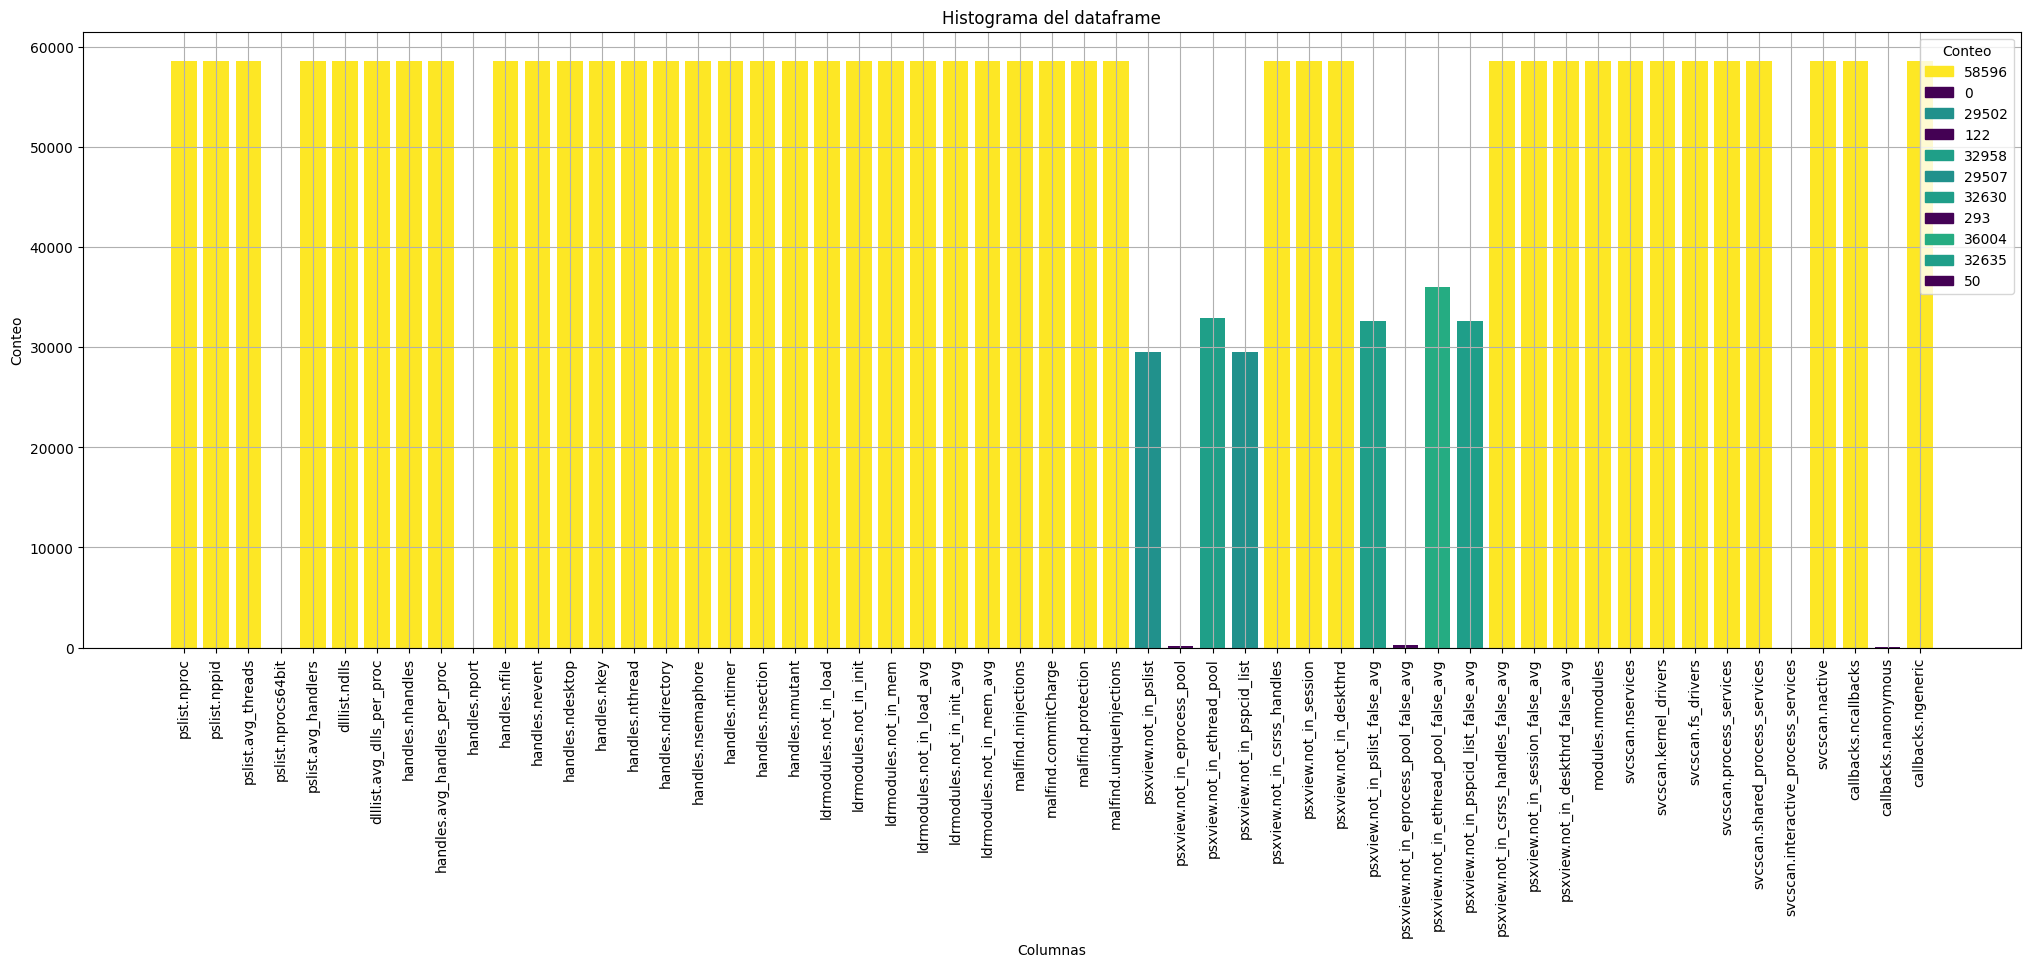

In [ ]:
# Extraer las llaves y los valores del diccionario
columnas = list(resultados.keys())
conteos_valores = list(resultados.values())

# Crear el histograma con colores diferentes y leyendas numéricas con los valores de los conteos
plt.figure(figsize=(25, 8))
legend_labels = {}
for columna, conteo in zip(columnas, conteos_valores):
    if conteo not in legend_labels:
        plt.bar(columna, conteo, color=plt.cm.viridis(conteo / max(conteos_valores)), label=str(conteo))
        legend_labels[conteo] = columna
    else:
        plt.bar(columna, conteo, color=plt.cm.viridis(conteo / max(conteos_valores)))

plt.xlabel('Columnas')
plt.ylabel('Conteo')
plt.title('Histograma del dataframe')
plt.xticks(rotation=90)
legend_handles = [plt.Rectangle((0,0),1,1, color=plt.cm.viridis(cont / max(conteos_valores))) for cont in legend_labels]
plt.legend(legend_handles, legend_labels.keys(), title='Conteo', loc='best')
plt.grid(True)
plt.show()

# 8. Ahora tenemos que limpiar los datos, necesitamos quitar las caracteristicas con pocos o nulos datos.

In [ ]:
# Encontrar las columnas que no tienen el valor 58596
columnas_a_limpiar = [columna for columna, conteo in resultados.items() if conteo != 58596]

# Mostrar las columnas que no cumplen el criterio
print("Columnas que no cumplen el criterio:")
print(columnas_a_limpiar)



Columnas que no cumplen el criterio:
['pslist.nprocs64bit', 'handles.nport', 'psxview.not_in_pslist', 'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool', 'psxview.not_in_pspcid_list', 'psxview.not_in_pslist_false_avg', 'psxview.not_in_eprocess_pool_false_avg', 'psxview.not_in_ethread_pool_false_avg', 'psxview.not_in_pspcid_list_false_avg', 'svcscan.interactive_process_services', 'callbacks.nanonymous']


## 8.1 Ahora que sabemos que columnas quitar, las quitamos del dataframe, con esto los datos están "limpios"

In [ ]:
# Eliminar las columnas del DataFrame
df_limpio = df.drop(columns = columnas_a_limpiar)

## 8.2 Verificamos el nuevo dataframe

In [ ]:
df_limpio.shape

(58596, 45)

## 8.3 Una última verificación

{'pslist.nproc': 58596, 'pslist.nppid': 58596, 'pslist.avg_threads': 58596, 'pslist.avg_handlers': 58596, 'dlllist.ndlls': 58596, 'dlllist.avg_dlls_per_proc': 58596, 'handles.nhandles': 58596, 'handles.avg_handles_per_proc': 58596, 'handles.nfile': 58596, 'handles.nevent': 58596, 'handles.ndesktop': 58596, 'handles.nkey': 58596, 'handles.nthread': 58596, 'handles.ndirectory': 58596, 'handles.nsemaphore': 58596, 'handles.ntimer': 58596, 'handles.nsection': 58596, 'handles.nmutant': 58596, 'ldrmodules.not_in_load': 58596, 'ldrmodules.not_in_init': 58596, 'ldrmodules.not_in_mem': 58596, 'ldrmodules.not_in_load_avg': 58596, 'ldrmodules.not_in_init_avg': 58596, 'ldrmodules.not_in_mem_avg': 58596, 'malfind.ninjections': 58596, 'malfind.commitCharge': 58596, 'malfind.protection': 58596, 'malfind.uniqueInjections': 58596, 'psxview.not_in_csrss_handles': 58596, 'psxview.not_in_session': 58596, 'psxview.not_in_deskthrd': 58596, 'psxview.not_in_csrss_handles_false_avg': 58596, 'psxview.not_in_ses

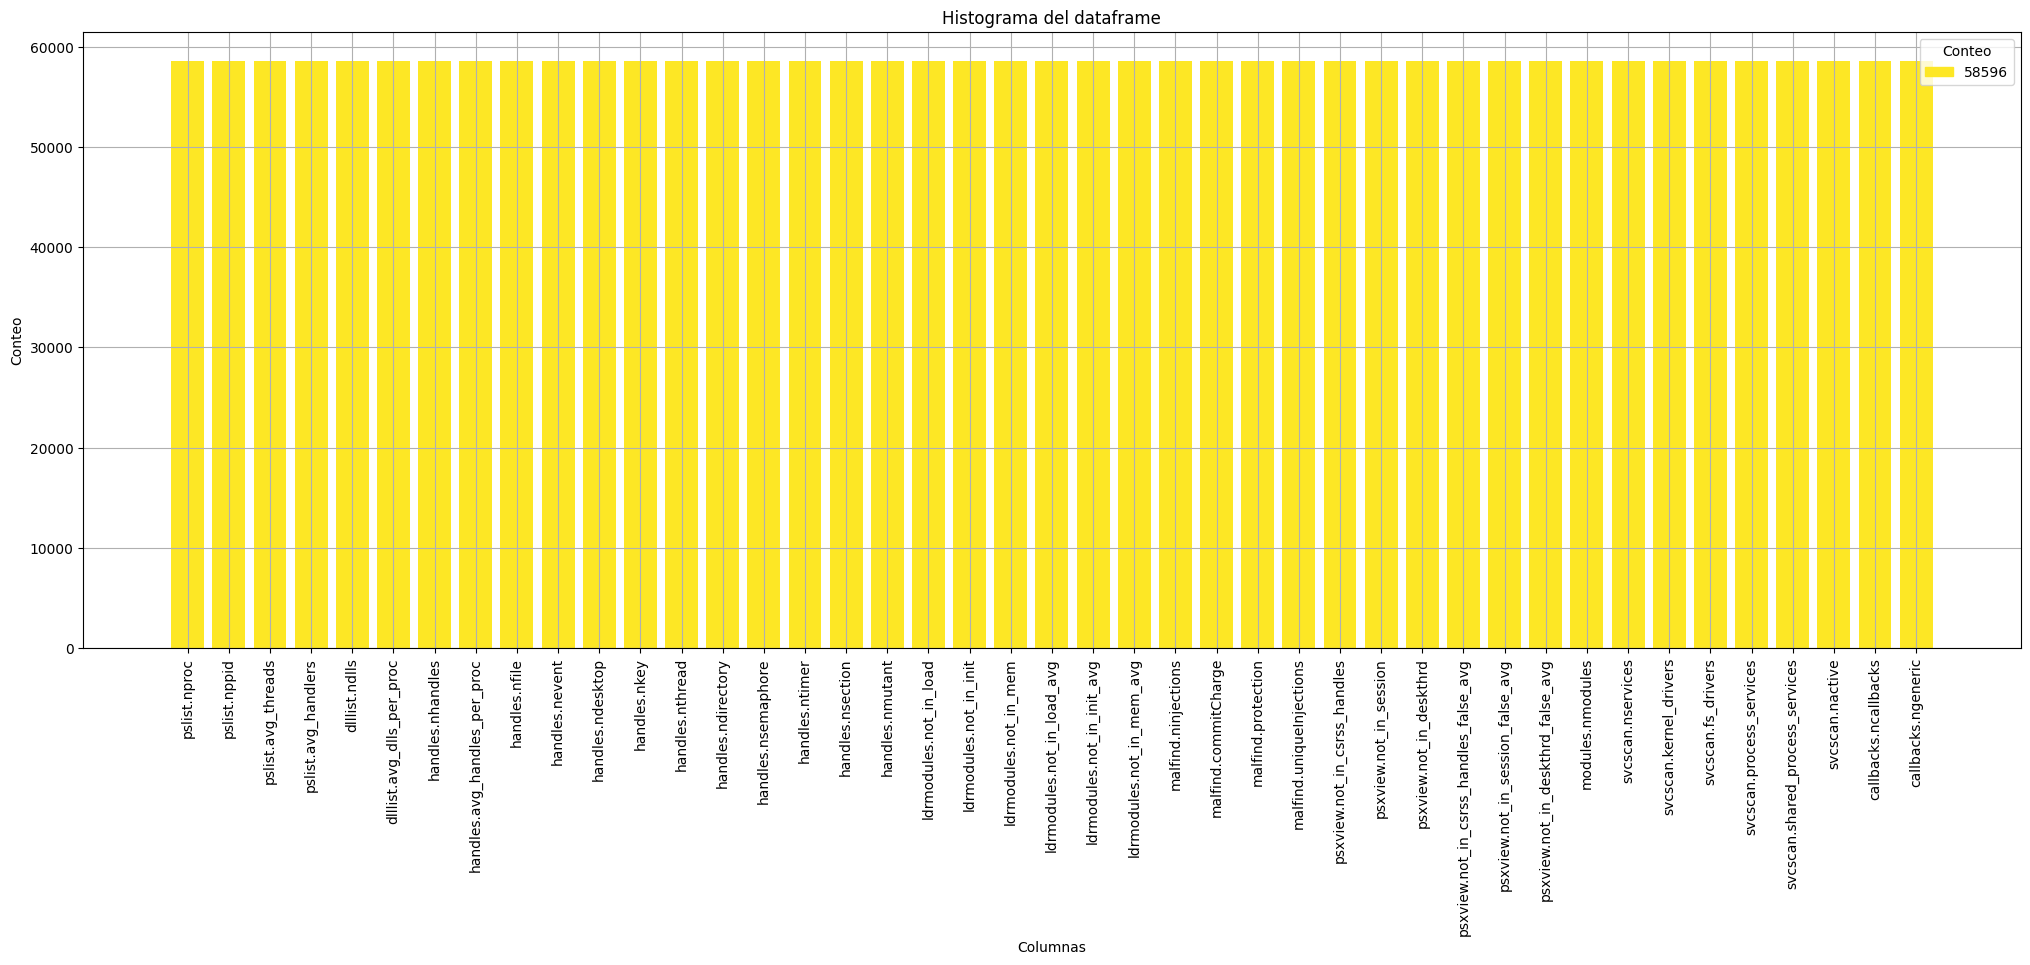

In [ ]:
# Lista de nombres de columnas
columnas = df_limpio.columns.tolist()

# Generar el diccionario de resultados
resultados = contar_ocurrencias_columnas(df_limpio, columnas)

# Imprimir el diccionario de resultados
print(resultados)

# Extraer las llaves y los valores del diccionario
columnas = list(resultados.keys())
conteos_valores = list(resultados.values())

# Crear el histograma con colores diferentes y leyendas numéricas con los valores de los conteos
plt.figure(figsize=(25, 8))
legend_labels = {}
for columna, conteo in zip(columnas, conteos_valores):
    if conteo not in legend_labels:
        plt.bar(columna, conteo, color=plt.cm.viridis(conteo / max(conteos_valores)), label=str(conteo))
        legend_labels[conteo] = columna
    else:
        plt.bar(columna, conteo, color=plt.cm.viridis(conteo / max(conteos_valores)))

plt.xlabel('Columnas')
plt.ylabel('Conteo')
plt.title('Histograma del dataframe')
plt.xticks(rotation=90)
legend_handles = [plt.Rectangle((0,0),1,1, color=plt.cm.viridis(cont / max(conteos_valores))) for cont in legend_labels]
plt.legend(legend_handles, legend_labels.keys(), title='Conteo', loc='best')
plt.grid(True)
plt.show()

# 9. Ahora queremos saber cuántos paquetes son Benignos y cuántos son Malware

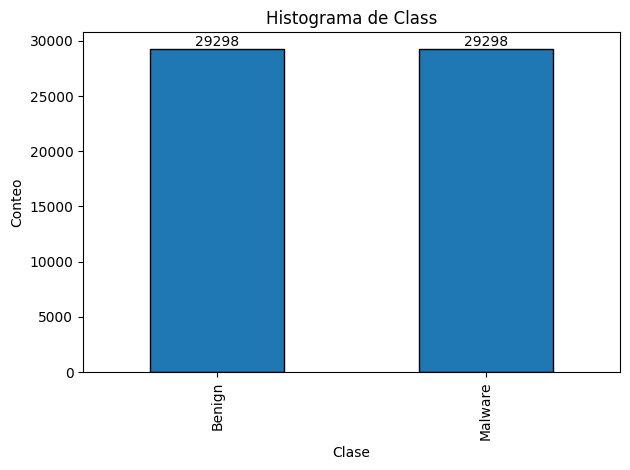

In [ ]:
# Histograma de 'Class'

# Obtener los conteos de cada clase
contadores_clase = df['Class'].value_counts()

# Crear el histograma de Class
contadores_clase.plot(kind='bar', edgecolor='black')

# Añadir anotaciones con los valores de cada barra
for i, cont in enumerate(contadores_clase):
    plt.text(i, cont + 0.1, str(cont), ha='center', va='bottom')

# Configurar título y etiquetas
plt.title('Histograma de Class')
plt.xlabel('Clase')
plt.ylabel('Conteo')

plt.tight_layout()
plt.show()

# 10. Ahora queremos saber el conteo de cada tipo de Malware

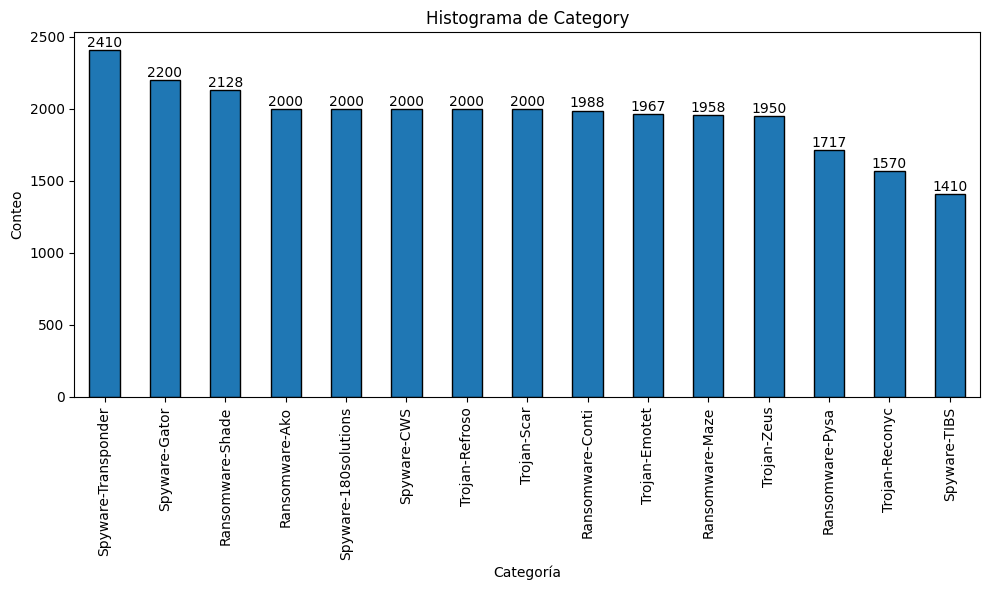

In [ ]:
# Preprocesar los datos de la columna 'Category' excluyendo 'Benign'
columna_filtrada = df_limpio[df_limpio['Category'] != 'Benign'].copy()

# Truncar los nombres en la columna 'Category' hasta el segundo guion
columna_filtrada['Category'] = columna_filtrada['Category'].apply(lambda x: '-'.join(x.split('-')[:2]))

# Crear histograma con Matplotlib
plt.figure(figsize=(10, 6))

# Histograma de 'Category'
conteos = columna_filtrada['Category'].value_counts()
conteos.plot(kind='bar', edgecolor='black')
plt.title('Histograma de Category')
plt.xlabel('Categoría')
plt.ylabel('Conteo')

# Agregar etiquetas con valores en las barras
for i, cont in enumerate(conteos):
    plt.text(i, cont + 0.1, str(cont), ha='center', va='bottom')

plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

# 11. Ahora realizaremos una serie de pasos para convertir los valores de la categoría "Class"

**Mapeo**


*   0 ➡ Benign
*   1 ➡ Malware



In [ ]:
df_limpio.head()

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0           202.844444           1694                  38.500000   
1           242.234043           2074                  44.127660   
2           288.225000           1932                  48.300000   
3           264.281250           1445                  45.156250   
4           281.333333           2067                  49.214286   

   handles.nhandles  handles.avg_handles_per_proc  handles.nfile  ...  \
0              9129                    212.302326            670  ...   
1             11385                    242.234043            840  ...   
2             11529                    288.225000           1050  ...   
3              8457                    264.281250            630  ...   
4             11816                    281.333333            908  ...   

   modules.nmodules  svcscan.nservices  svcscan.kernel_drivers  \
0               138                389                     221   
1               138                392                     222   
2               137                395                     222   
3               138                395                     222   
4               138                392                     222   

   svcscan.fs_drivers  svcscan.process_services  \
0                  26                        24   
1                  26                        24   
2                  26                        27   
3                  26                        27   
4                  26                        24   

   svcscan.shared_process_services  svcscan.nactive  callbacks.ncallbacks  \
0                              116              121                    87   
1                              118              122                    87   
2                              118              120                    88   
3                              118              120                    88   
4                              118              124                    87   

   callbacks.ngeneric   Class  
0                   8  Benign  
1                   8  Benign  
2                   8  Benign  
3                   8  Benign  
4                   8  Benign  

[5 rows x 45 columns]

In [ ]:
# Reemplazar los valores en la columna 'Class'
df_limpio['Class'] = df_limpio['Class'].replace({'Benign': 0, 'Malware': 1})

# Opcional, convertir la columna a tipo booleano
# df_limpio['Class'] = df_limpio['Class'].astype(bool)

# Muestra del DataFrame después del reemplazo
print(df_limpio['Class'].value_counts())  # Verificación de los nuevos valores únicos
df_limpio.head()  # Muestra las primeras filas del DataFrame para verificar los cambios


Class
0    29298
1    29298
Name: count, dtype: int64


Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0           202.844444           1694                  38.500000   
1           242.234043           2074                  44.127660   
2           288.225000           1932                  48.300000   
3           264.281250           1445                  45.156250   
4           281.333333           2067                  49.214286   

   handles.nhandles  handles.avg_handles_per_proc  handles.nfile  ...  \
0              9129                    212.302326            670  ...   
1             11385                    242.234043            840  ...   
2             11529                    288.225000           1050  ...   
3              8457                    264.281250            630  ...   
4             11816                    281.333333            908  ...   

   modules.nmodules  svcscan.nservices  svcscan.kernel_drivers  \
0               138                389                     221   
1               138                392                     222   
2               137                395                     222   
3               138                395                     222   
4               138                392                     222   

   svcscan.fs_drivers  svcscan.process_services  \
0                  26                        24   
1                  26                        24   
2                  26                        27   
3                  26                        27   
4                  26                        24   

   svcscan.shared_process_services  svcscan.nactive  callbacks.ncallbacks  \
0                              116              121                    87   
1                              118              122                    87   
2                              118              120                    88   
3                              118              120                    88   
4                              118              124                    87   

   callbacks.ngeneric  Class  
0                   8      0  
1                   8      0  
2                   8      0  
3                   8      0  
4                   8      0  

[5 rows x 45 columns]

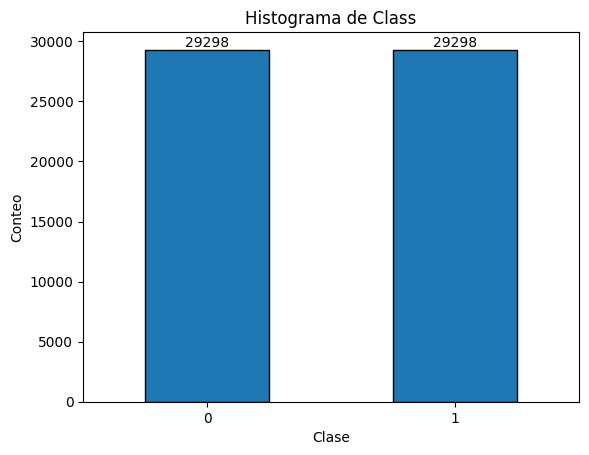

In [ ]:
# Histograma de 'Class'

# Obtener los conteos de cada clase
contadores_clase = df_limpio['Class'].value_counts()

# Crear el histograma de Class
contadores_clase.plot(kind='bar', edgecolor='black')

# Añadir anotaciones con los valores de cada barra
for i, cont in enumerate(contadores_clase):
    plt.text(i, cont + 0.1, str(cont), ha='center', va='bottom')

# Configurar título y etiquetas
plt.title('Histograma de Class')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.show()

# 12. Ahora necesitamos normalizar el dataframe

In [ ]:
# Normalizar el DataFrame
df_normalizado = df_limpio.apply(lambda x: (x - x.min()) / (x.max() - x.min()) if x.name not in ['Category', 'Class'] else x)

# Muestra del DataFrame normalizado
df_normalizado.head()

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign      0.109589      0.140625            0.587121   
1   Benign      0.118721      0.171875            0.651490   
2   Benign      0.086758      0.093750            0.862002   
3   Benign      0.050228      0.078125            0.781241   
4   Benign      0.095890      0.125000            0.646246   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0             0.006766       0.369275                   0.679940   
1             0.008354       0.506311                   0.802714   
2             0.010208       0.455103                   0.893739   
3             0.009243       0.279481                   0.825154   
4             0.009930       0.503787                   0.913685   

   handles.nhandles  handles.avg_handles_per_proc  handles.nfile  ...  \
0          0.005379                      0.004187       0.000501  ...   
1          0.007541                      0.005075       0.000712  ...   
2          0.007679                      0.006439       0.000972  ...   
3          0.004736                      0.005729       0.000451  ...   
4          0.007954                      0.006235       0.000796  ...   

   modules.nmodules  svcscan.nservices  svcscan.kernel_drivers  \
0          1.000000           0.980066                0.994012   
1          1.000000           0.990033                1.000000   
2          0.916667           1.000000                1.000000   
3          1.000000           1.000000                1.000000   
4          1.000000           0.990033                1.000000   

   svcscan.fs_drivers  svcscan.process_services  \
0                 1.0                      0.85   
1                 1.0                      0.85   
2                 1.0                      1.00   
3                 1.0                      1.00   
4                 1.0                      0.85   

   svcscan.shared_process_services  svcscan.nactive  callbacks.ncallbacks  \
0                         0.978261         0.919192              0.948718   
1                         1.000000         0.929293              0.948718   
2                         1.000000         0.909091              0.974359   
3                         1.000000         0.909091              0.974359   
4                         1.000000         0.949495              0.948718   

   callbacks.ngeneric  Class  
0                 1.0      0  
1                 1.0      0  
2                 1.0      0  
3                 1.0      0  
4                 1.0      0  

[5 rows x 45 columns]

In [ ]:
df_normalizado.dtypes

Category                                   object
pslist.nproc                              float64
pslist.nppid                              float64
pslist.avg_threads                        float64
pslist.avg_handlers                       float64
dlllist.ndlls                             float64
dlllist.avg_dlls_per_proc                 float64
handles.nhandles                          float64
handles.avg_handles_per_proc              float64
handles.nfile                             float64
handles.nevent                            float64
handles.ndesktop                          float64
handles.nkey                              float64
handles.nthread                           float64
handles.ndirectory                        float64
handles.nsemaphore                        float64
handles.ntimer                            float64
handles.nsection                          float64
handles.nmutant                           float64
ldrmodules.not_in_load                    float64


In [ ]:
# Muestra del DataFrame resultante
df_normalizado.head()

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign      0.109589      0.140625            0.587121   
1   Benign      0.118721      0.171875            0.651490   
2   Benign      0.086758      0.093750            0.862002   
3   Benign      0.050228      0.078125            0.781241   
4   Benign      0.095890      0.125000            0.646246   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0             0.006766       0.369275                   0.679940   
1             0.008354       0.506311                   0.802714   
2             0.010208       0.455103                   0.893739   
3             0.009243       0.279481                   0.825154   
4             0.009930       0.503787                   0.913685   

   handles.nhandles  handles.avg_handles_per_proc  handles.nfile  ...  \
0          0.005379                      0.004187       0.000501  ...   
1          0.007541                      0.005075       0.000712  ...   
2          0.007679                      0.006439       0.000972  ...   
3          0.004736                      0.005729       0.000451  ...   
4          0.007954                      0.006235       0.000796  ...   

   modules.nmodules  svcscan.nservices  svcscan.kernel_drivers  \
0          1.000000           0.980066                0.994012   
1          1.000000           0.990033                1.000000   
2          0.916667           1.000000                1.000000   
3          1.000000           1.000000                1.000000   
4          1.000000           0.990033                1.000000   

   svcscan.fs_drivers  svcscan.process_services  \
0                 1.0                      0.85   
1                 1.0                      0.85   
2                 1.0                      1.00   
3                 1.0                      1.00   
4                 1.0                      0.85   

   svcscan.shared_process_services  svcscan.nactive  callbacks.ncallbacks  \
0                         0.978261         0.919192              0.948718   
1                         1.000000         0.929293              0.948718   
2                         1.000000         0.909091              0.974359   
3                         1.000000         0.909091              0.974359   
4                         1.000000         0.949495              0.948718   

   callbacks.ngeneric  Class  
0                 1.0      0  
1                 1.0      0  
2                 1.0      0  
3                 1.0      0  
4                 1.0      0  

[5 rows x 45 columns]

## 12.1 Verificamos algo...

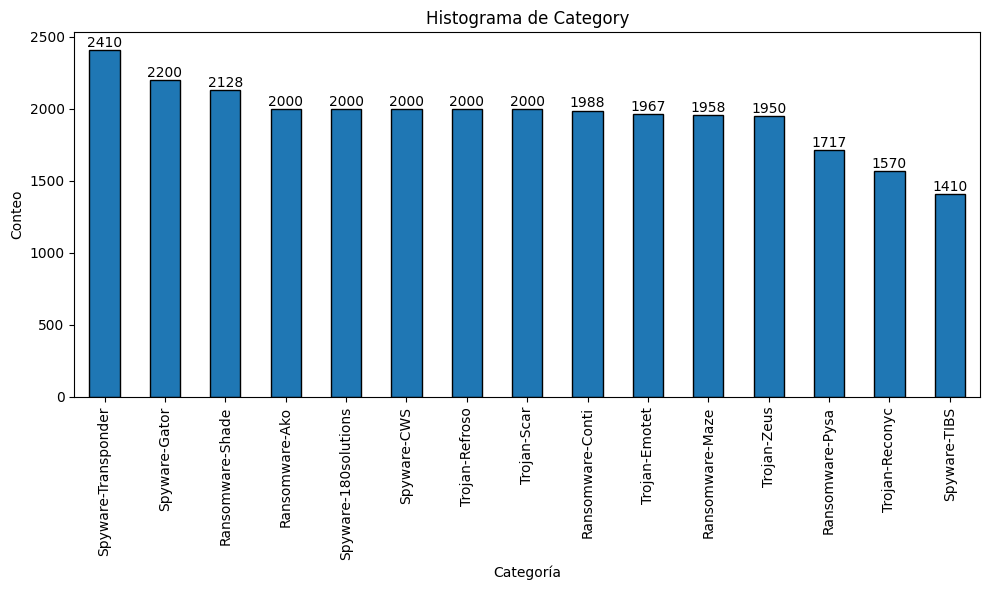

In [ ]:
# Preprocesar los datos de la columna 'Category' excluyendo 'Benign'
columna_filtrada = df_normalizado[df_normalizado['Category'] != 'Benign'].copy()

# Truncar los nombres en la columna 'Category' hasta el segundo guion
columna_filtrada['Category'] = columna_filtrada['Category'].apply(lambda x: '-'.join(x.split('-')[:2]))

# Crear histograma con Matplotlib
plt.figure(figsize=(10, 6))

# Histograma de 'Category'
conteos = columna_filtrada['Category'].value_counts()
conteos.plot(kind='bar', edgecolor='black')
plt.title('Histograma de Category')
plt.xlabel('Categoría')
plt.ylabel('Conteo')

# Agregar etiquetas con valores en las barras
for i, cont in enumerate(conteos):
    plt.text(i, cont + 0.1, str(cont), ha='center', va='bottom')

plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

# 13. Cambiar las etiquetas de la columna de categoria de a cuerdo con la técnica de OneHot

Duda: ¿Se tienen que cambiar los labels de la categoría de Malware? ➡ Debido a que cada categoría de Malware tiene bastantes tipos de ejecición

In [ ]:
df_normalizado['Category'].value_counts()

Category
Benign                                                                                     29298
Spyware-Gator-1bdcd3b777965f67678748d2577b119a275aca9aed9549d45e64e692a54a7b5e-1.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-2.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-10.raw          2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-1.raw           2
                                                                                           ...  
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-6.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-5.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-4.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-3.raw           1
Ransomware-Shade-955d

In [ ]:

# Copiamos el df para preservar los datos
df_norm_etiquetas = df_normalizado.copy()

# Se hace la magia
df_norm_etiquetas['Category'] = df_norm_etiquetas['Category'].apply(lambda x: x if x == 'Benign' else '-'.join(x.split('-')[:2]))

# Guardar el resultado en otro df
df_etiquetas_correctas = df_norm_etiquetas.copy()

df_etiquetas_correctas.head()

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign      0.109589      0.140625            0.587121   
1   Benign      0.118721      0.171875            0.651490   
2   Benign      0.086758      0.093750            0.862002   
3   Benign      0.050228      0.078125            0.781241   
4   Benign      0.095890      0.125000            0.646246   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0             0.006766       0.369275                   0.679940   
1             0.008354       0.506311                   0.802714   
2             0.010208       0.455103                   0.893739   
3             0.009243       0.279481                   0.825154   
4             0.009930       0.503787                   0.913685   

   handles.nhandles  handles.avg_handles_per_proc  handles.nfile  ...  \
0          0.005379                      0.004187       0.000501  ...   
1          0.007541                      0.005075       0.000712  ...   
2          0.007679                      0.006439       0.000972  ...   
3          0.004736                      0.005729       0.000451  ...   
4          0.007954                      0.006235       0.000796  ...   

   modules.nmodules  svcscan.nservices  svcscan.kernel_drivers  \
0          1.000000           0.980066                0.994012   
1          1.000000           0.990033                1.000000   
2          0.916667           1.000000                1.000000   
3          1.000000           1.000000                1.000000   
4          1.000000           0.990033                1.000000   

   svcscan.fs_drivers  svcscan.process_services  \
0                 1.0                      0.85   
1                 1.0                      0.85   
2                 1.0                      1.00   
3                 1.0                      1.00   
4                 1.0                      0.85   

   svcscan.shared_process_services  svcscan.nactive  callbacks.ncallbacks  \
0                         0.978261         0.919192              0.948718   
1                         1.000000         0.929293              0.948718   
2                         1.000000         0.909091              0.974359   
3                         1.000000         0.909091              0.974359   
4                         1.000000         0.949495              0.948718   

   callbacks.ngeneric  Class  
0                 1.0      0  
1                 1.0      0  
2                 1.0      0  
3                 1.0      0  
4                 1.0      0  

[5 rows x 45 columns]

In [ ]:
df_etiquetas_correctas['Category'].value_counts()

Category
Benign                  29298
Spyware-Transponder      2410
Spyware-Gator            2200
Ransomware-Shade         2128
Ransomware-Ako           2000
Spyware-180solutions     2000
Spyware-CWS              2000
Trojan-Refroso           2000
Trojan-Scar              2000
Ransomware-Conti         1988
Trojan-Emotet            1967
Ransomware-Maze          1958
Trojan-Zeus              1950
Ransomware-Pysa          1717
Trojan-Reconyc           1570
Spyware-TIBS             1410
Name: count, dtype: int64

Ahora que ya lo cambiamos, procedemos a realizar el One-Hot Encoding como se vió en este video [Video que Explica el One-Hot Encoding](https://www.youtube.com/watch?v=DAQhQFp-sCg)

In [ ]:
#Category_dummies = pd.get_dummies(df_etiquetas_correctas['Category'])
from sklearn.preprocessing import OneHotEncoder

# Creamos una copia del dataframe original
df = df_etiquetas_correctas.copy()

# Inicializar y ajustar el codificador one-hot
encoder = OneHotEncoder()

# Ajustar y transformar la columna 'Category'
X = df['Category'].values.reshape(-1, 1)
X_codificado = encoder.fit_transform(X)

# Obtener las catagorias codificadas
categorias_codificadas = encoder.categories_[0]

#Creamos un dataframe con las columnas codificadas
df_columnas_codificadas= pd.DataFrame(X_codificado.toarray(), columns=categorias_codificadas, index=df.index)

# Concatenamos
df_one_hot_FINAL = pd.concat([df, df_columnas_codificadas], axis=1)

# Eliminamos la columna 'Category'
df_one_hot_FINAL = df_one_hot_FINAL.drop('Category', axis = 1)

df_one_hot_FINAL.head()


pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0      0.109589      0.140625            0.587121             0.006766   
1      0.118721      0.171875            0.651490             0.008354   
2      0.086758      0.093750            0.862002             0.010208   
3      0.050228      0.078125            0.781241             0.009243   
4      0.095890      0.125000            0.646246             0.009930   

   dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
0       0.369275                   0.679940          0.005379   
1       0.506311                   0.802714          0.007541   
2       0.455103                   0.893739          0.007679   
3       0.279481                   0.825154          0.004736   
4       0.503787                   0.913685          0.007954   

   handles.avg_handles_per_proc  handles.nfile  handles.nevent  ...  \
0                      0.004187       0.000501        0.316922  ...   
1                      0.005075       0.000712        0.403552  ...   
2                      0.006439       0.000972        0.437482  ...   
3                      0.005729       0.000451        0.288045  ...   
4                      0.006235       0.000796        0.414092  ...   

   Spyware-180solutions  Spyware-CWS  Spyware-Gator  Spyware-TIBS  \
0                   0.0          0.0            0.0           0.0   
1                   0.0          0.0            0.0           0.0   
2                   0.0          0.0            0.0           0.0   
3                   0.0          0.0            0.0           0.0   
4                   0.0          0.0            0.0           0.0   

   Spyware-Transponder  Trojan-Emotet  Trojan-Reconyc  Trojan-Refroso  \
0                  0.0            0.0             0.0             0.0   
1                  0.0            0.0             0.0             0.0   
2                  0.0            0.0             0.0             0.0   
3                  0.0            0.0             0.0             0.0   
4                  0.0            0.0             0.0             0.0   

   Trojan-Scar  Trojan-Zeus  
0          0.0          0.0  
1          0.0          0.0  
2          0.0          0.0  
3          0.0          0.0  
4          0.0          0.0  

[5 rows x 60 columns]

**NOTA** Se supone que al aplicar One-Hot Encoding, se elimina la columna categorica y nos quedamos con las que contatenamos anteriormente.

In [ ]:
df_one_hot_FINAL.shape
df_one_hot_FINAL.dtypes

pslist.nproc                              float64
pslist.nppid                              float64
pslist.avg_threads                        float64
pslist.avg_handlers                       float64
dlllist.ndlls                             float64
dlllist.avg_dlls_per_proc                 float64
handles.nhandles                          float64
handles.avg_handles_per_proc              float64
handles.nfile                             float64
handles.nevent                            float64
handles.ndesktop                          float64
handles.nkey                              float64
handles.nthread                           float64
handles.ndirectory                        float64
handles.nsemaphore                        float64
handles.ntimer                            float64
handles.nsection                          float64
handles.nmutant                           float64
ldrmodules.not_in_load                    float64
ldrmodules.not_in_init                    float64


## 13.1 Label encoding ?¿

OK, de acuerdo con lo que le entendí al profesor, esto es lo que se tiene que realizar.
+ Benign ➡              1000000000000000
+ Spyware-Transponder ➡ 0100000000000000
+ Spyware-Gator ➡       0010000000000000
+ Ransomware-Shade ➡    0001000000000000
+ Ransomware-Ako ➡      0000100000000000
+ Spyware-180solutions ➡0000010000000000
+ Spyware-CWS ➡         0000001000000000
+ Trojan-Refroso ➡      0000000100000000
+ Trojan-Scar ➡         0000000010000000
+ Ransomware-Conti ➡    0000000001000000
+ Trojan-Emotet ➡       0000000000100000
+ Ransomware-Maze ➡     0000000000010000
+ Trojan-Zeus ➡         0000000000001000
+ Ransomware-Pysa ➡     0000000000000100
+ Trojan-Reconyc ➡      0000000000000010
+ Spyware-TIBS ➡        0000000000000001

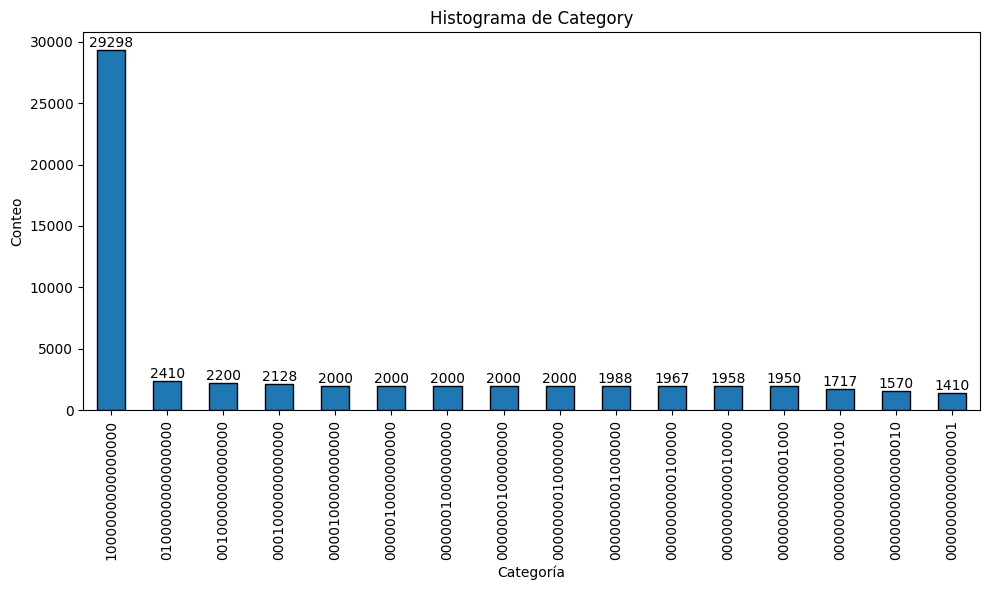

In [ ]:
df_label_encoding = df_etiquetas_correctas.copy()

# creamos un diccionario
correspondencia_etiquetas = {
    'Benign': '1000000000000000',
    'Spyware-Transponder': '0100000000000000',
    'Spyware-Gator': '0010000000000000',
    'Ransomware-Shade': '0001000000000000',
    'Ransomware-Ako': '0000100000000000',
    'Spyware-180solutions': '0000010000000000',
    'Spyware-CWS': '0000001000000000',
    'Trojan-Refroso': '0000000100000000',
    'Trojan-Scar': '0000000010000000',
    'Ransomware-Conti': '0000000001000000',
    'Trojan-Emotet': '0000000000100000',
    'Ransomware-Maze': '0000000000010000',
    'Trojan-Zeus': '0000000000001000',
    'Ransomware-Pysa': '0000000000000100',
    'Trojan-Reconyc': '0000000000000010',
    'Spyware-TIBS': '0000000000000001'
}

# Reemplazamos
df_label_encoding['Category'] = df_label_encoding['Category'].replace(correspondencia_etiquetas)

# verificamos
plt.figure(figsize=(10, 6))
total = df_label_encoding['Category'].value_counts()
total.plot(kind='bar', edgecolor='black')
plt.title('Histograma de Category')
plt.xlabel('Categoría')
plt.ylabel('Conteo')

# Agregar etiquetas con valores en las barras
for i, cont in enumerate(total):
    plt.text(i, cont + 0.1, str(cont), ha='center', va='bottom')

plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

# DUDA: ¿Entonces cuál tomamos?

# 14. Particionar el dataframe en dos partes Training (80%) y Test (20%)

Para hacer esto hay dos formas diferentes


1.   Utilizar la libreria sklearn.model_selection (importamos *train_test_split*)
2.   Particionarlos usando las librerias pandas y numpy



## 14.1 Libreria sklearn





### 14.1.1 Utilizamos el dataframe de one_hot_FINAL

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos el df en training (80%) y test (20%) estratificando según la columna 'target'
df_train_OHF, df_test_OHF = train_test_split(df_one_hot_FINAL.copy(), test_size=0.2, random_state=42, stratify=df_one_hot_FINAL['Class'])

# Mostrar la forma de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", len(df_train_OHF))
print("Tamaño del conjunto de prueba:", len(df_test_OHF))

Tamaño del conjunto de entrenamiento: 46876
Tamaño del conjunto de prueba: 11720


In [ ]:
df_train_OHF.head()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
9434       0.086758      0.062500            0.742625             0.010359   
26912      0.091324      0.062500            0.810390             0.011180   
47022      0.063927      0.109375            0.674815             0.006419   
19371      0.105023      0.062500            0.704435             0.009894   
17129      0.086758      0.062500            0.737168             0.010377   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
9434        0.474216                   0.922645          0.007822   
26912       0.539127                   0.992278          0.008902   
47022       0.242697                   0.677135          0.003146   
19371       0.562207                   0.927560          0.008651   
17129       0.474216                   0.922645          0.007840   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  ...  \
9434                       0.006551       0.001049        0.451343  ...   
26912                      0.007155       0.001066        0.506353  ...   
47022                      0.003651       0.000409        0.166907  ...   
19371                      0.006208       0.001016        0.503898  ...   
17129                      0.006564       0.001042        0.454375  ...   

       Spyware-180solutions  Spyware-CWS  Spyware-Gator  Spyware-TIBS  \
9434                    0.0          0.0            0.0           0.0   
26912                   0.0          0.0            0.0           0.0   
47022                   0.0          0.0            0.0           0.0   
19371                   0.0          0.0            0.0           0.0   
17129                   0.0          0.0            0.0           0.0   

       Spyware-Transponder  Trojan-Emotet  Trojan-Reconyc  Trojan-Refroso  \
9434                   0.0            0.0             0.0             0.0   
26912                  0.0            0.0             0.0             0.0   
47022                  0.0            1.0             0.0             0.0   
19371                  0.0            0.0             0.0             0.0   
17129                  0.0            0.0             0.0             0.0   

       Trojan-Scar  Trojan-Zeus  
9434           0.0          0.0  
26912          0.0          0.0  
47022          0.0          0.0  
19371          0.0          0.0  
17129          0.0          0.0  

[5 rows x 60 columns]

In [ ]:
df_test_OHF.head()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
50843      0.086758      0.140625            0.530716             0.006991   
37832      0.091324      0.125000            0.626070             0.007248   
6645       0.095890      0.062500            0.771045             0.010797   
27932      0.082192      0.062500            0.746429             0.010381   
28932      0.091324      0.093750            0.735630             0.010237   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
50843       0.324558                   0.696302          0.004621   
37832       0.347638                   0.709471          0.005070   
6645        0.549946                   0.980173          0.008819   
27932       0.458348                   0.925792          0.007563   
28932       0.497656                   0.930827          0.007982   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  ...  \
50843                      0.004072       0.000466        0.279238  ...   
37832                      0.004261       0.000480        0.298585  ...   
6645                       0.006873       0.001028        0.506208  ...   
27932                      0.006567       0.000948        0.444124  ...   
28932                      0.006461       0.000971        0.457551  ...   

       Spyware-180solutions  Spyware-CWS  Spyware-Gator  Spyware-TIBS  \
50843                   0.0          0.0            0.0           0.0   
37832                   0.0          1.0            0.0           0.0   
6645                    0.0          0.0            0.0           0.0   
27932                   0.0          0.0            0.0           0.0   
28932                   0.0          0.0            0.0           0.0   

       Spyware-Transponder  Trojan-Emotet  Trojan-Reconyc  Trojan-Refroso  \
50843                  0.0            0.0             0.0             1.0   
37832                  0.0            0.0             0.0             0.0   
6645                   0.0            0.0             0.0             0.0   
27932                  0.0            0.0             0.0             0.0   
28932                  0.0            0.0             0.0             0.0   

       Trojan-Scar  Trojan-Zeus  
50843          0.0          0.0  
37832          0.0          0.0  
6645           0.0          0.0  
27932          0.0          0.0  
28932          0.0          0.0  

[5 rows x 60 columns]

### 14.1.2 Utilizamos el dataframe de label_encoding

In [ ]:
# Dividimos el df en training (80%) y test (20%)
df_train_LE, df_test_LE = train_test_split(df_label_encoding.copy(), test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", len(df_train_LE))
print("Tamaño del conjunto de prueba:", len(df_test_LE))

NameError: name 'df_label_encoding' is not defined

In [ ]:
df_train_LE.head()

In [ ]:
df_test_LE.head()

# 15. Desarrollo de la red

Para probar una red neuronal, se debe de hacer una sola neurona con 16 entradas (son los tipos de paquete) 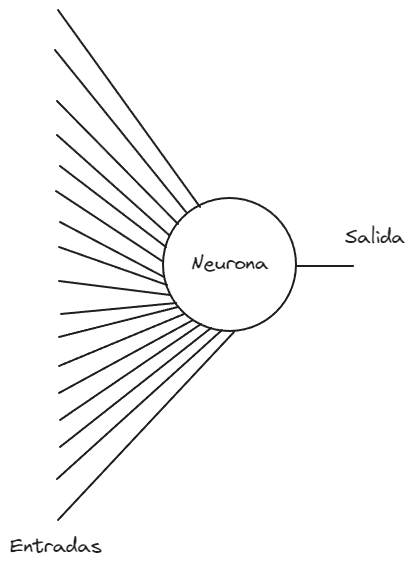

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Selección de las columnas one-hot del tipo de paquete
OH_cols = [col for col in df_one_hot_FINAL.columns if 'Benign' in col or 'Ransomware' in col or 'Spyware' in col or 'Trojan' in col]

print(OH_cols)

#X = df_one_hot_FINAL.drop(['Class'], axis=1) # Selecciona solo las 16 columnas one-hot

#print(X)
#X.shape

['Benign', 'Ransomware-Ako', 'Ransomware-Conti', 'Ransomware-Maze', 'Ransomware-Pysa', 'Ransomware-Shade', 'Spyware-180solutions', 'Spyware-CWS', 'Spyware-Gator', 'Spyware-TIBS', 'Spyware-Transponder', 'Trojan-Emotet', 'Trojan-Reconyc', 'Trojan-Refroso', 'Trojan-Scar', 'Trojan-Zeus']


In [ ]:
# Separamos las caracteristicas y las etiquetas
X = df_one_hot_FINAL.drop(['Class'], axis=1).values # Caracteristicas
#X = df_one_hot_FINAL.drop(OH_cols, axis=1).values # Caracteristicas
y = df_one_hot_FINAL['Class'].values #Etiquetas
X.shape

(58596, 59)

In [ ]:
# Caracteristicas de entrada (entradas de la neurona)
dimension_inputs = 59

In [ ]:
# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_one_hot_FINAL['Class'])

# Mostrar la forma de los conjuntos de entrenamiento y prueba (80 - 20)
print("Tamaño del conjunto de entrenamiento x:", len(X_train))
print("Tamaño del conjunto de prueba x:", len(X_test))
print("Tamaño del conjunto de entrenamiento y:", len(y_train))
print("Tamaño del conjunto de prueba y:", len(y_test))

Tamaño del conjunto de entrenamiento x: 46876
Tamaño del conjunto de prueba x: 11720
Tamaño del conjunto de entrenamiento y: 46876
Tamaño del conjunto de prueba y: 11720


In [ ]:
#Creamos el modelo secuencial
modelo = Sequential()
modelo.add(Dense(1, input_dim=dimension_inputs, activation='sigmoid'))

In [ ]:
# Compilamos el modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenamiento del modelo
modelo.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1465/1465 [==============================] - 6s 3ms/step - loss: 0.3825 - accuracy: 0.9525 - val_loss: 0.1912 - val_accuracy: 0.9987
Epoch 2/100
1465/1465 [==============================] - 3s 2ms/step - loss: 0.1227 - accuracy: 0.9985 - val_loss: 0.0765 - val_accuracy: 0.9989
Epoch 3/100
1465/1465 [==============================] - 3s 2ms/step - loss: 0.0539 - accuracy: 0.9990 - val_loss: 0.0367 - val_accuracy: 0.9995
Epoch 4/100
1465/1465 [==============================] - 3s 2ms/step - loss: 0.0270 - accuracy: 0.9999 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 5/100
1465/1465 [==============================] - 3s 2ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 6/100
1465/1465 [==============================] - 4s 3ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 7/100
1465/1465 [==============================] - 3s 2ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0033 - val_ac

In [ ]:
# Evaluamos al modelo
perdida, exactitud = modelo.evaluate(X_test, y_test)
print(f'Perdida en la prueba: {perdida:.4f}')
print(f'Exactitud en la prueba: {exactitud:.4f}')

367/367 [==============================] - 1s 1ms/step - loss: 7.7573e-09 - accuracy: 1.0000
Perdida en la prueba: 0.0000
Exactitud en la prueba: 1.0000


# 16. Red Neuronal de prueba 1

In [ ]:
#Eliminacion de columnas one-hot y 'Class'
one_hot_cols = [col for col in df_one_hot_FINAL.columns if 'Benign' in col or 'Ransomware' in col or 'Spyware' in col or 'Trojan' in col]
X_1 = df_one_hot_FINAL.drop(['Class'] + one_hot_cols, axis=1).values


In [ ]:
# obtención de las etiquetas
y_1 = df_one_hot_FINAL['Class'].values

In [ ]:
# Obtener la forma de los datos
print("Forma de X_1:", X_1.shape)
print("Forma de y_1:", y_1.shape)

Forma de X_1: (58596, 43)
Forma de y_1: (58596,)


In [ ]:
# Obtener el número de características de entrada
input_dim = X.shape[1]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Crear el modelo
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # La salida tiene que ser la misma que el shape del target (y)

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
epochs = 1000  # Número de épocas (puedes ajustarlo según tus necesidades)
batch_size = 500  # Tamaño del lote (puedes ajustarlo según tus necesidades)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/1000
94/94 [==============================] - 2s 6ms/step - loss: 0.2614 - accuracy: 0.9929 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 2/1000
94/94 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/1000
94/94 [==============================] - 0s 4ms/step - loss: 6.5528e-04 - accuracy: 1.0000 - val_loss: 3.7410e-04 - val_accuracy: 1.0000
Epoch 4/1000
94/94 [==============================] - 0s 4ms/step - loss: 2.6875e-04 - accuracy: 1.0000 - val_loss: 1.8232e-04 - val_accuracy: 1.0000
Epoch 5/1000
94/94 [==============================] - 0s 4ms/step - loss: 1.4193e-04 - accuracy: 1.0000 - val_loss: 1.0671e-04 - val_accuracy: 1.0000
Epoch 6/1000
94/94 [==============================] - 0s 4ms/step - loss: 8.8428e-05 - accuracy: 1.0000 - val_loss: 7.0739e-05 - val_accuracy: 1.0000
Epoch 7/1000
94/94 [==============================] - 0s 4ms/step - loss: 6.0733e-05 - accuracy: 1.0000 - val_loss: 

In [ ]:
import os

# Crear un directorio para guardar el modelo
model_dir = 'modelo_binario'
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

# Guardar el modelo en formato SavedModel
model.save(model_dir, save_format='tf')

In [ ]:
import os
from tensorflow import keras

# Cargar el modelo desde el directorio
model_dir = '/content/drive/MyDrive/modelo_binario'
modelo_binario = keras.models.load_model(model_dir)

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

367/367 [==============================] - 1s 1ms/step - loss: 3.2159e-10 - accuracy: 1.0000
Test loss: 0.0000
Test accuracy: 1.0000


In [ ]:

# Hacer predicciones

predictions = model.predict(X_test)
print(predictions)
predictions.shape


367/367 [==============================] - 1s 2ms/step
[[1.000000e+00]
 [1.000000e+00]
 [3.767154e-13]
 ...
 [1.000000e+00]
 [1.000000e+00]
 [1.000000e+00]]


(11720, 1)

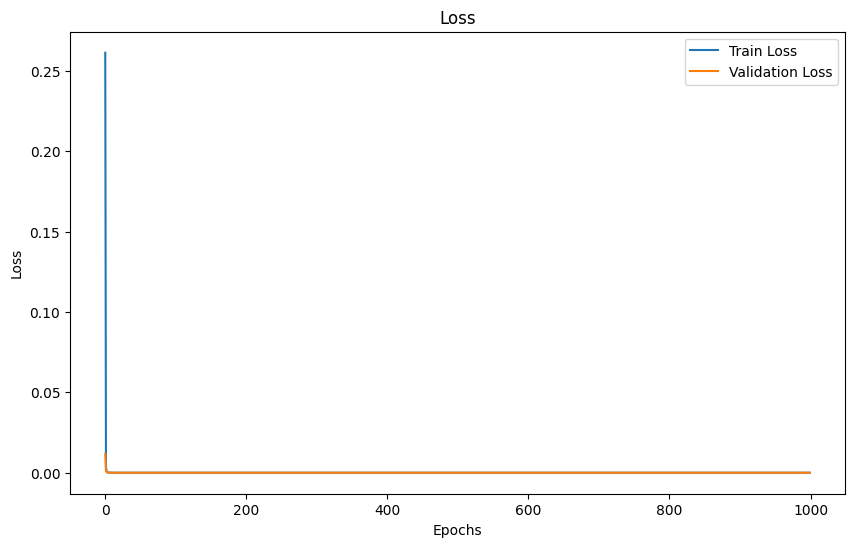

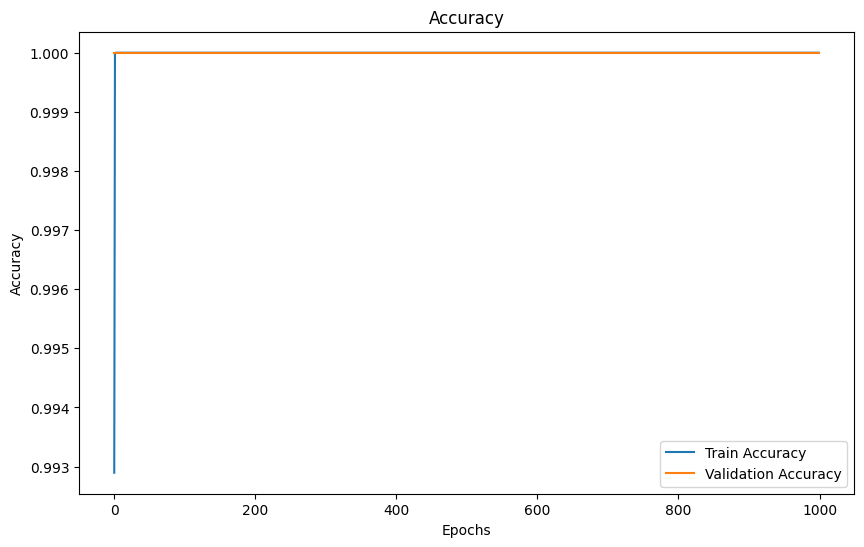

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:

import plotly.graph_objects as go

# Graficar loss
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history.history['loss']))),
                         y=history.history['loss'],
                         mode='lines',
                         name='Train Loss'))
fig.add_trace(go.Scatter(x=list(range(len(history.history['val_loss']))),
                         y=history.history['val_loss'],
                         mode='lines',
                         name='Validation Loss'))
fig.update_layout(title='Loss',
                  xaxis_title='Epochs',
                  yaxis_title='Loss')
fig.show()

# Graficar accuracy
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history.history['accuracy']))),
                         y=history.history['accuracy'],
                         mode='lines',
                         name='Train Accuracy'))
fig.add_trace(go.Scatter(x=list(range(len(history.history['val_accuracy']))),
                         y=history.history['val_accuracy'],
                         mode='lines',
                         name='Validation Accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis_title='Epochs',
                  yaxis_title='Accuracy')
fig.show()

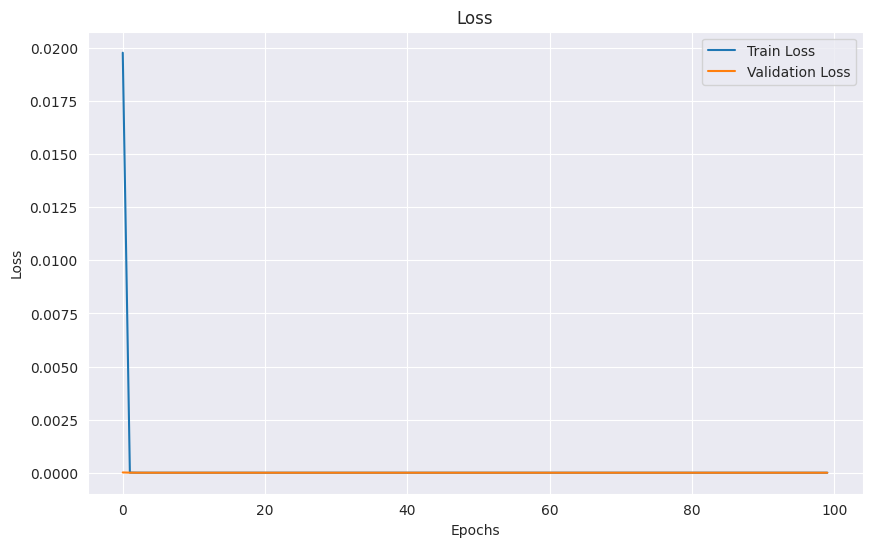

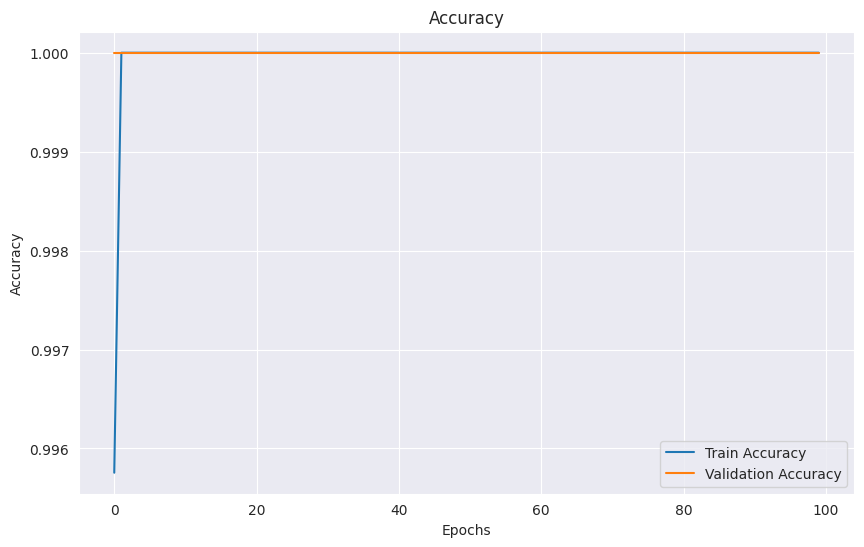

In [ ]:
import seaborn as sns

# Graficar loss
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Train Loss')
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Train Accuracy')
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 17. Red neuronal con softmax

In [ ]:
# Eliminar las columnas one-hot y 'Class'
one_hot_cols = [col for col in df_one_hot_FINAL.columns if 'Benign' in col or 'Ransomware' in col or 'Spyware' in col or 'Trojan' in col]
X_2 = df_one_hot_FINAL.drop(['Class'] + one_hot_cols, axis=1).values


In [ ]:
# Obtener las etiquetas
y_2 = df_one_hot_FINAL[one_hot_cols].values

In [ ]:
# Obtener la forma de los datos
print("Forma de X:", X_2.shape)
print("Forma de y:", y_2.shape)

Forma de X: (58596, 43)
Forma de y: (58596, 16)


In [ ]:
# Obtener el número de características de entrada
input_dim_2 = X_2.shape[1]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42, stratify=y_2)



In [ ]:
# Crear el modelo
model_2 = Sequential()
model_2.add(Dense(64, input_dim=input_dim_2, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(16, activation='softmax'))

In [ ]:
# Compilar el modelo
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Entrenar el modelo
epochs = 100  # Número de épocas (puedes ajustarlo según tus necesidades)
batch_size = 32  # Tamaño del lote (puedes ajustarlo según tus necesidades)
history = model_2.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2))



Epoch 1/100
1465/1465 [==============================] - 5s 3ms/step - loss: 0.1435 - accuracy: 0.5107 - val_loss: 0.1181 - val_accuracy: 0.5443
Epoch 2/100
1465/1465 [==============================] - 5s 3ms/step - loss: 0.1158 - accuracy: 0.5463 - val_loss: 0.1139 - val_accuracy: 0.5555
Epoch 3/100
1465/1465 [==============================] - 3s 2ms/step - loss: 0.1128 - accuracy: 0.5532 - val_loss: 0.1112 - val_accuracy: 0.5620
Epoch 4/100
1465/1465 [==============================] - 3s 2ms/step - loss: 0.1115 - accuracy: 0.5610 - val_loss: 0.1106 - val_accuracy: 0.5715
Epoch 5/100
1465/1465 [==============================] - 3s 2ms/step - loss: 0.1107 - accuracy: 0.5678 - val_loss: 0.1099 - val_accuracy: 0.5683
Epoch 6/100
1465/1465 [==============================] - 4s 3ms/step - loss: 0.1099 - accuracy: 0.5713 - val_loss: 0.1095 - val_accuracy: 0.5741
Epoch 7/100
1465/1465 [==============================] - 3s 2ms/step - loss: 0.1092 - accuracy: 0.5737 - val_loss: 0.1085 - val_ac

In [ ]:
# Evaluar el modelo
loss_2, accuracy_2 = model_2.evaluate(X_test_2, y_test_2)
print(f'Test loss: {loss_2:.4f}')
print(f'Test accuracy: {accuracy_2:.4f}')

367/367 [==============================] - 1s 3ms/step - loss: 0.0972 - accuracy: 0.6289
Test loss: 0.0972
Test accuracy: 0.6289


In [ ]:
# Hacer predicciones

predictions_2 = model_2.predict(X_test_2)
print(predictions_2)

367/367 [==============================] - 1s 2ms/step
[[9.99999940e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.98345898e-38]
 [2.56324802e-05 5.47744706e-02 7.23628476e-02 ... 1.22873504e-02
  2.18547121e-01 4.17406857e-02]
 [1.32247875e-08 4.91994917e-02 6.22108281e-02 ... 7.99979568e-02
  8.82507637e-02 7.08974674e-02]
 ...
 [9.99999940e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.97052116e-27]
 [9.99999940e-01 4.44106845e-36 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.49620852e-24]
 [9.99999940e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


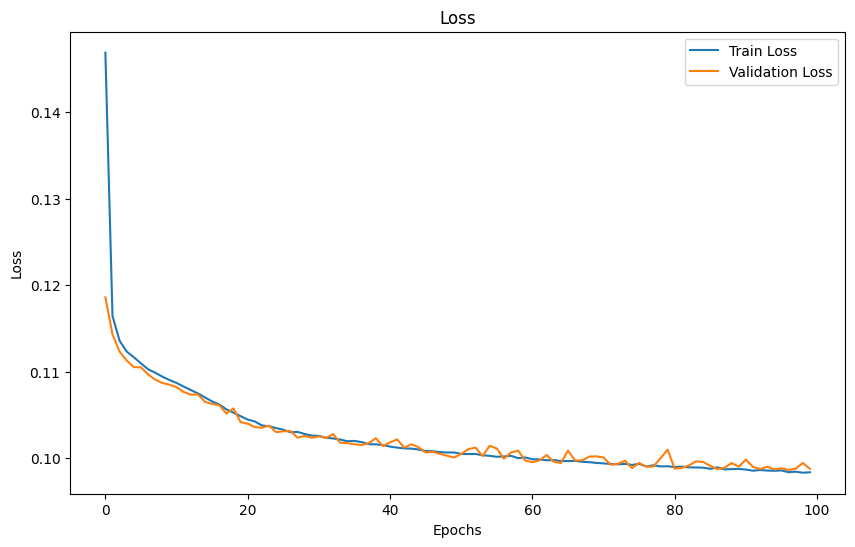

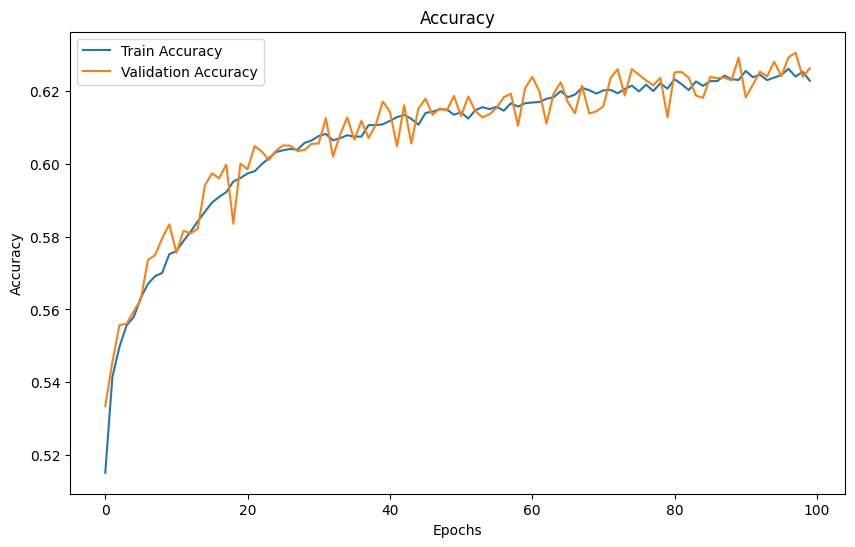

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
# Entrenar el modelo
epochs = 200  # Número de épocas (puedes ajustarlo según tus necesidades)
batch_size = 32  # Tamaño del lote (puedes ajustarlo según tus necesidades)
history = model_2.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2))



Epoch 1/200
1465/1465 [==============================] - 6s 3ms/step - loss: 0.1463 - accuracy: 0.5170 - val_loss: 0.1176 - val_accuracy: 0.5414
Epoch 2/200
1465/1465 [==============================] - 6s 4ms/step - loss: 0.1153 - accuracy: 0.5499 - val_loss: 0.1130 - val_accuracy: 0.5603
Epoch 3/200
1465/1465 [==============================] - 5s 4ms/step - loss: 0.1126 - accuracy: 0.5586 - val_loss: 0.1117 - val_accuracy: 0.5612
Epoch 4/200
1465/1465 [==============================] - 6s 4ms/step - loss: 0.1114 - accuracy: 0.5626 - val_loss: 0.1104 - val_accuracy: 0.5692
Epoch 5/200
1465/1465 [==============================] - 6s 4ms/step - loss: 0.1106 - accuracy: 0.5682 - val_loss: 0.1099 - val_accuracy: 0.5749
Epoch 6/200
1465/1465 [==============================] - 6s 4ms/step - loss: 0.1100 - accuracy: 0.5704 - val_loss: 0.1097 - val_accuracy: 0.5706
Epoch 7/200
1465/1465 [==============================] - 6s 4ms/step - loss: 0.1096 - accuracy: 0.5693 - val_loss: 0.1090 - val_ac

In [ ]:
# Evaluar el modelo
loss_2, accuracy_2 = model_2.evaluate(X_test_2, y_test_2)
print(f'Test loss: {loss_2:.4f}')
print(f'Test accuracy: {accuracy_2:.4f}')

367/367 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.6380
Test loss: 0.0965
Test accuracy: 0.6380


In [ ]:
# Hacer predicciones

predictions_2 = model_2.predict(X_test_2)
print(predictions_2)

367/367 [==============================] - 1s 3ms/step
[[9.9999994e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [6.2142913e-06 3.3454228e-02 7.0911430e-02 ... 7.3994920e-03
  1.5747075e-01 7.3288097e-03]
 [9.1823310e-08 6.5638095e-02 6.5333158e-02 ... 5.3261865e-02
  6.5073855e-02 9.2947446e-02]
 ...
 [9.9999994e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [9.9999994e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [9.9999994e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


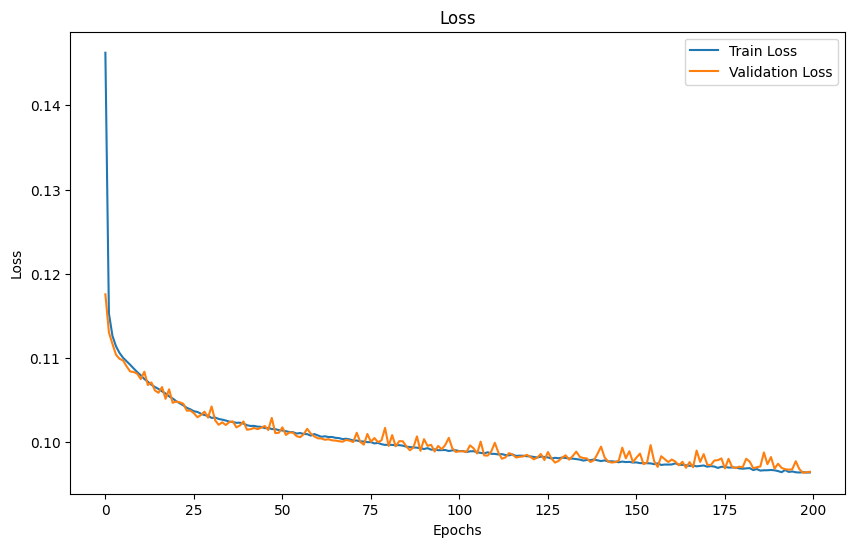

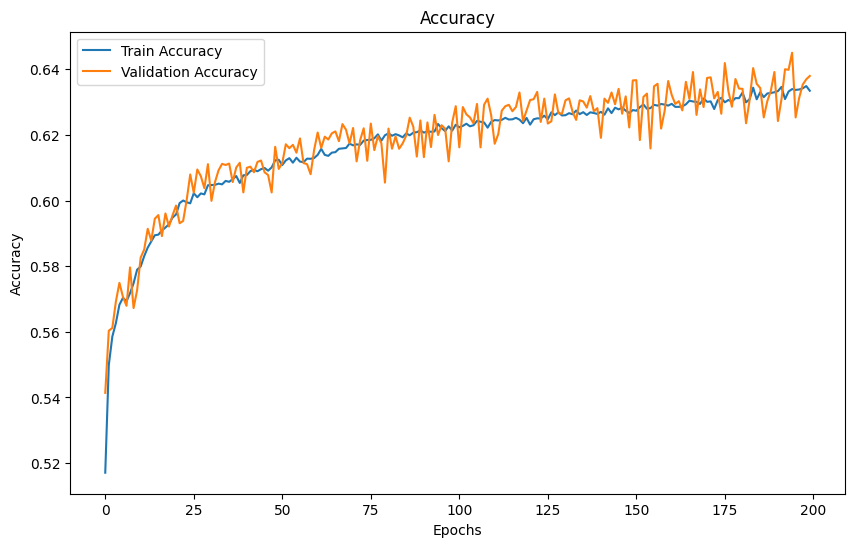

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
# Crear el modelo
model_3 = Sequential()
model_3.add(Dense(64, input_dim=input_dim_2, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(16, activation='softmax'))

# Compilar el modelo
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
epochs = 400  # Número de épocas (puedes ajustarlo según tus necesidades)
batch_size = 32  # Tamaño del lote (puedes ajustarlo según tus necesidades)
history = model_3.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2))


Epoch 1/400
1465/1465 [==============================] - 5s 3ms/step - loss: 0.1418 - accuracy: 0.5146 - val_loss: 0.1155 - val_accuracy: 0.5542
Epoch 2/400
1465/1465 [==============================] - 3s 2ms/step - loss: 0.1141 - accuracy: 0.5530 - val_loss: 0.1122 - val_accuracy: 0.5664
Epoch 3/400
1465/1465 [==============================] - 5s 3ms/step - loss: 0.1122 - accuracy: 0.5606 - val_loss: 0.1124 - val_accuracy: 0.5646
Epoch 4/400
1465/1465 [==============================] - 3s 2ms/step - loss: 0.1113 - accuracy: 0.5644 - val_loss: 0.1105 - val_accuracy: 0.5675
Epoch 5/400
1465/1465 [==============================] - 3s 2ms/step - loss: 0.1106 - accuracy: 0.5696 - val_loss: 0.1097 - val_accuracy: 0.5726
Epoch 6/400
1465/1465 [==============================] - 4s 3ms/step - loss: 0.1100 - accuracy: 0.5715 - val_loss: 0.1092 - val_accuracy: 0.5723
Epoch 7/400
1465/1465 [==============================] - 5s 3ms/step - loss: 0.1094 - accuracy: 0.5750 - val_loss: 0.1093 - val_ac

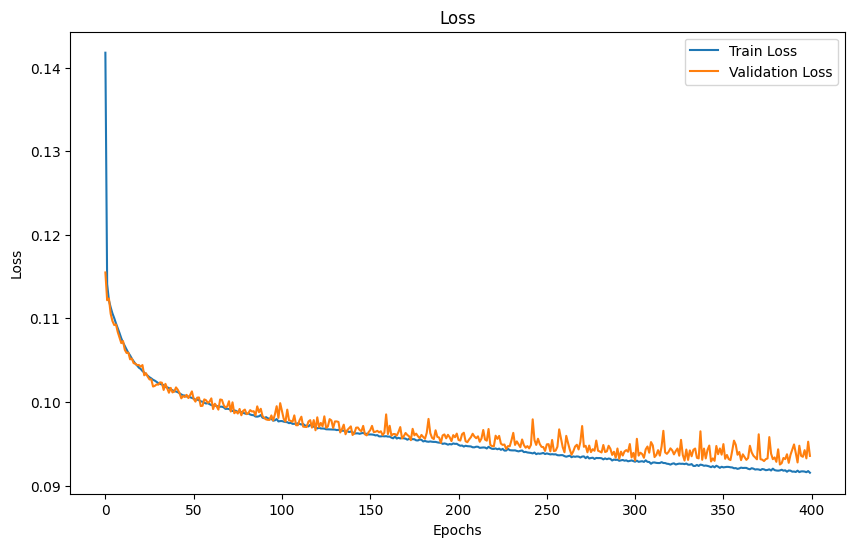

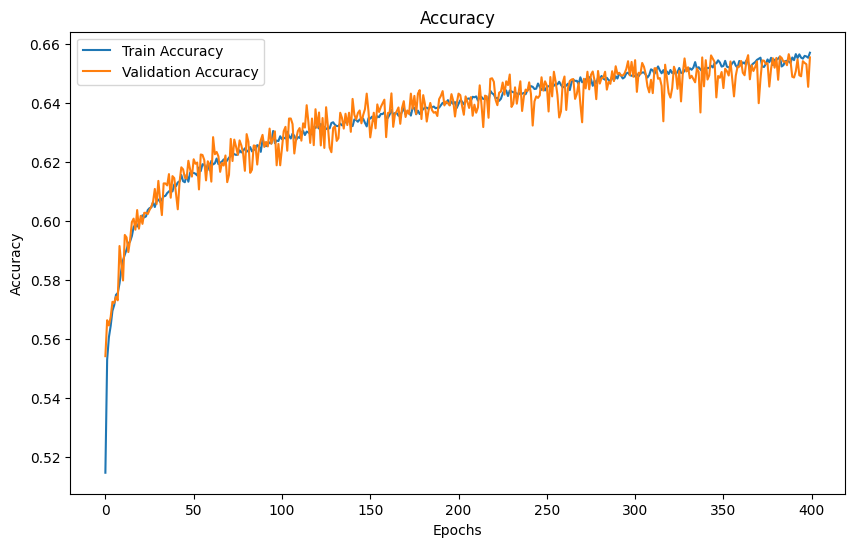

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

### Otro ejemplo

In [ ]:


# Crear el modelo
model_4 = Sequential()
model_4.add(Dense(64, input_dim=input_dim_2, activation='relu'))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(16, activation='softmax'))  # Última capa con activación softmax

# Compilar el modelo
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 600  # Aumentar el número de épocas
batch_size = 64  # Ajustar el tamaño del lote

# Entrenar el modelo
history = model_4.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2), validation_split=0.2)

Epoch 1/600
733/733 [==============================] - 3s 2ms/step - loss: 1.4967 - accuracy: 0.5264 - val_loss: 1.3455 - val_accuracy: 0.5522
Epoch 2/600
733/733 [==============================] - 2s 2ms/step - loss: 1.3208 - accuracy: 0.5566 - val_loss: 1.3047 - val_accuracy: 0.5611
Epoch 3/600
733/733 [==============================] - 2s 2ms/step - loss: 1.3023 - accuracy: 0.5607 - val_loss: 1.2884 - val_accuracy: 0.5654
Epoch 4/600
733/733 [==============================] - 2s 2ms/step - loss: 1.2931 - accuracy: 0.5650 - val_loss: 1.2841 - val_accuracy: 0.5708
Epoch 5/600
733/733 [==============================] - 2s 2ms/step - loss: 1.2835 - accuracy: 0.5685 - val_loss: 1.2743 - val_accuracy: 0.5722
Epoch 6/600
733/733 [==============================] - 2s 3ms/step - loss: 1.2774 - accuracy: 0.5705 - val_loss: 1.2702 - val_accuracy: 0.5743
Epoch 7/600
733/733 [==============================] - 3s 4ms/step - loss: 1.2700 - accuracy: 0.5748 - val_loss: 1.2625 - val_accuracy: 0.5808

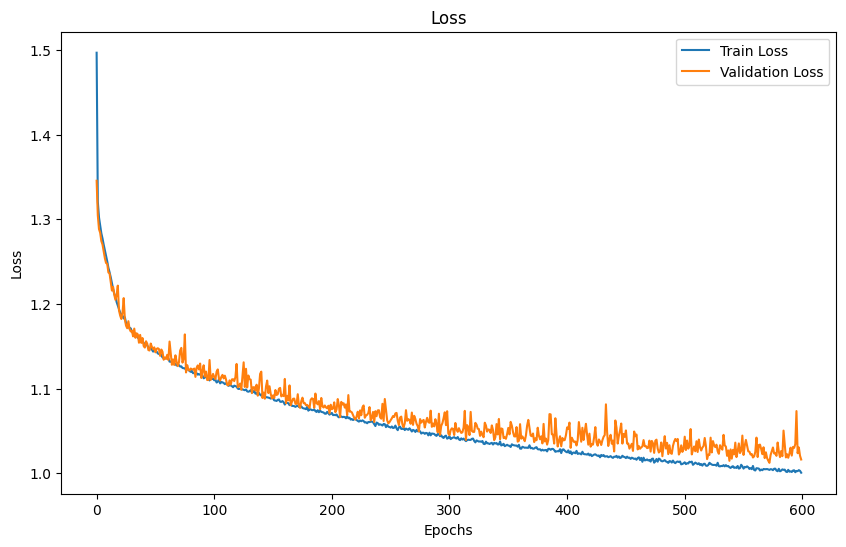

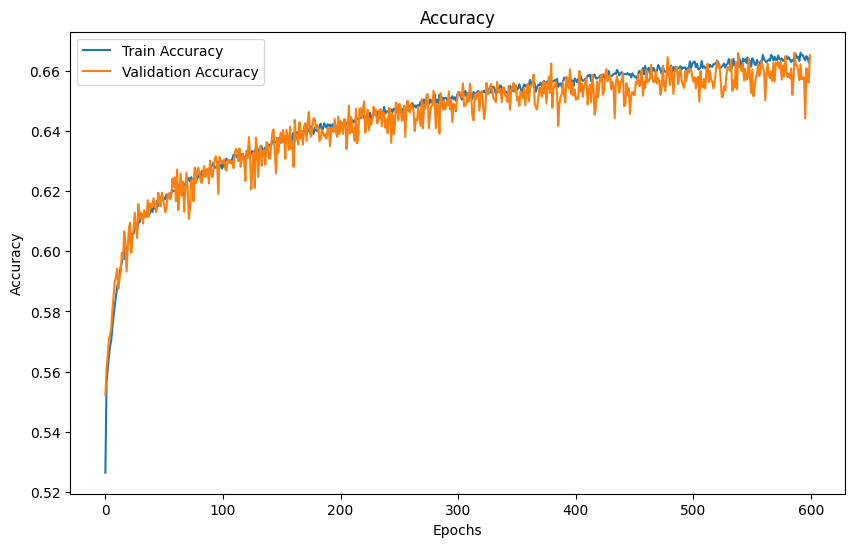

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:

# Crear el modelo
model_5 = Sequential()
model_5.add(Dense(1024, input_dim=input_dim_2, activation='relu'))
model_5.add(Dense(512, activation='relu'))
model_5.add(Dense(256, activation='relu'))
model_5.add(Dense(128, activation='relu'))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(32, activation='relu'))
model_5.add(Dense(16, activation='softmax'))  # Última capa con activación softmax

# Compilar el modelo
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 600
batch_size = 64

# Entrenar el modelo
history = model_5.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2), validation_split=0.2)

Epoch 1/600
733/733 [==============================] - 19s 25ms/step - loss: 0.1348 - accuracy: 0.5205 - val_loss: 0.1142 - val_accuracy: 0.5486
Epoch 2/600
733/733 [==============================] - 14s 20ms/step - loss: 0.1133 - accuracy: 0.5476 - val_loss: 0.1128 - val_accuracy: 0.5490
Epoch 3/600
733/733 [==============================] - 15s 20ms/step - loss: 0.1117 - accuracy: 0.5579 - val_loss: 0.1097 - val_accuracy: 0.5695
Epoch 4/600
733/733 [==============================] - 15s 20ms/step - loss: 0.1102 - accuracy: 0.5681 - val_loss: 0.1106 - val_accuracy: 0.5666
Epoch 5/600
733/733 [==============================] - 15s 20ms/step - loss: 0.1084 - accuracy: 0.5735 - val_loss: 0.1074 - val_accuracy: 0.5796
Epoch 6/600
733/733 [==============================] - 14s 19ms/step - loss: 0.1069 - accuracy: 0.5808 - val_loss: 0.1061 - val_accuracy: 0.5826
Epoch 7/600
733/733 [==============================] - 15s 20ms/step - loss: 0.1067 - accuracy: 0.5823 - val_loss: 0.1086 - val_ac

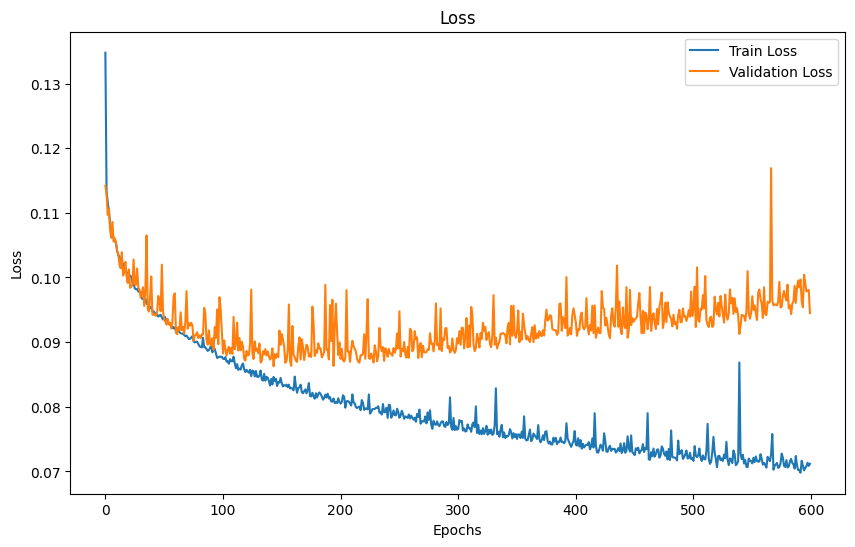

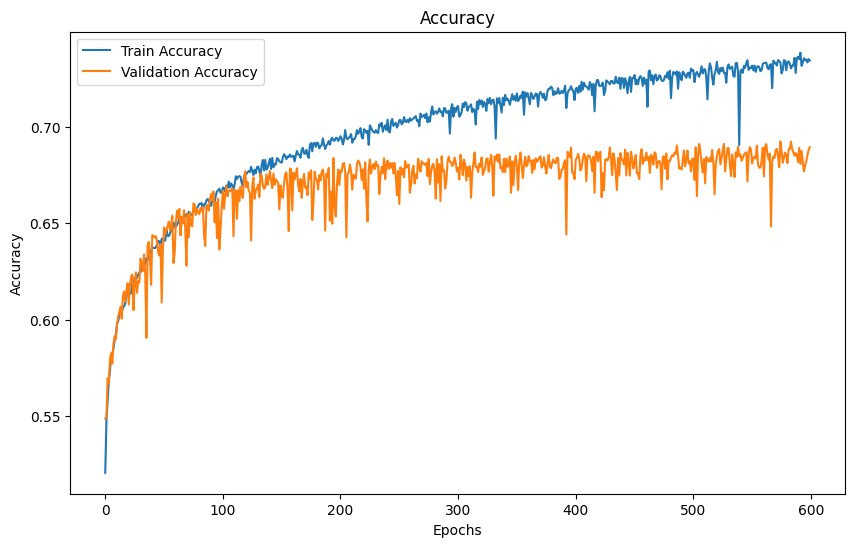

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
from tensorflow.keras.layers import Dropout

# Obtener el número de clases
num_classes = y_train_2.shape[1]

# Crear el modelo
model_6 = Sequential()
model_6.add(Dense(128, input_dim=input_dim_2, activation='relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(64, activation='relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(32, activation='relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 500  # Aumentar el número de épocas
batch_size = 64  # Ajustar el tamaño del lote

# Entrenar el modelo
history = model_6.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2))

Epoch 1/500
733/733 [==============================] - 3s 3ms/step - loss: 1.4955 - accuracy: 0.5229 - val_loss: 1.3542 - val_accuracy: 0.5412
Epoch 2/500
733/733 [==============================] - 2s 2ms/step - loss: 1.3385 - accuracy: 0.5495 - val_loss: 1.3024 - val_accuracy: 0.5525
Epoch 3/500
733/733 [==============================] - 2s 2ms/step - loss: 1.3162 - accuracy: 0.5555 - val_loss: 1.2904 - val_accuracy: 0.5610
Epoch 4/500
733/733 [==============================] - 2s 3ms/step - loss: 1.3039 - accuracy: 0.5608 - val_loss: 1.2785 - val_accuracy: 0.5637
Epoch 5/500
733/733 [==============================] - 2s 3ms/step - loss: 1.2924 - accuracy: 0.5663 - val_loss: 1.2660 - val_accuracy: 0.5741
Epoch 6/500
733/733 [==============================] - 2s 2ms/step - loss: 1.2855 - accuracy: 0.5683 - val_loss: 1.2594 - val_accuracy: 0.5806
Epoch 7/500
733/733 [==============================] - 2s 2ms/step - loss: 1.2738 - accuracy: 0.5733 - val_loss: 1.2465 - val_accuracy: 0.5853

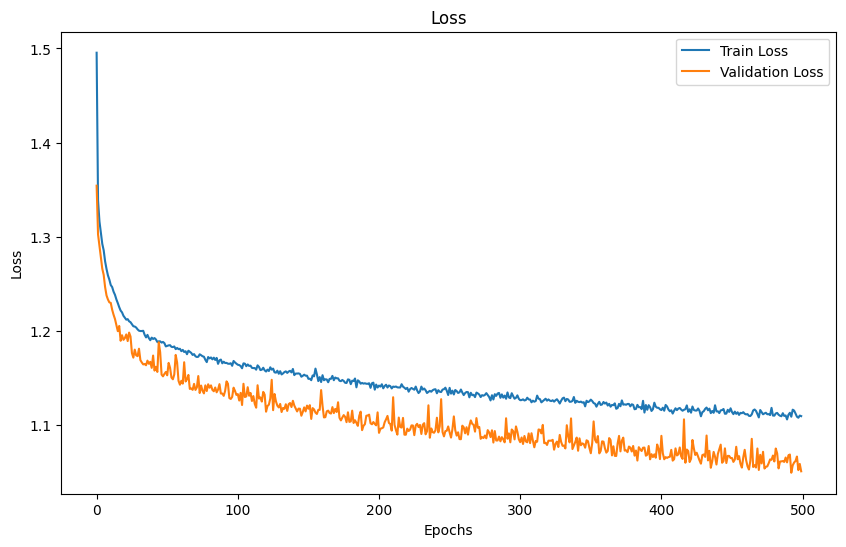

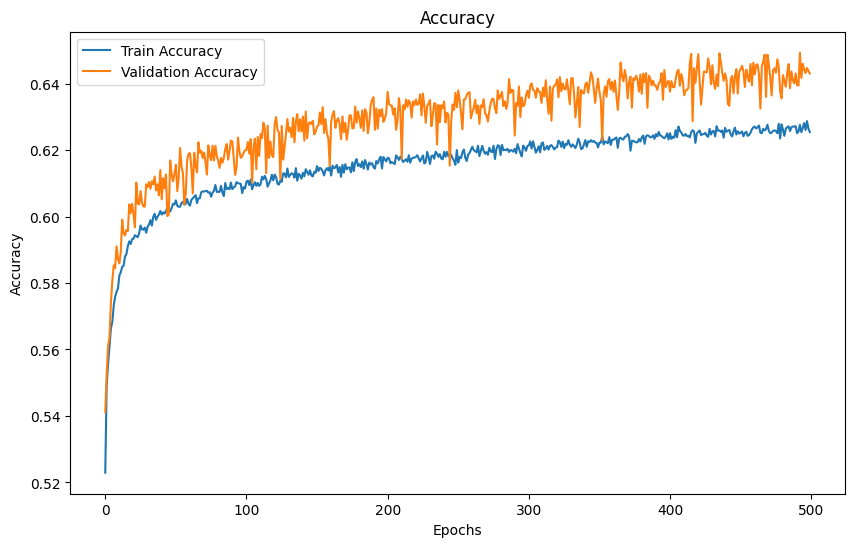

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
# Crear el modelo
model_7 = Sequential()
model_7.add(Dense(128, input_dim=input_dim_2, activation='relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(64, activation='relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(32, activation='relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model_7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 500  # Aumentar el número de épocas
batch_size = 64  # Ajustar el tamaño del lote

# Entrenar el modelo
history = model_7.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2))

Epoch 1/500
733/733 [==============================] - 3s 3ms/step - loss: 0.1520 - accuracy: 0.4976 - val_loss: 0.1166 - val_accuracy: 0.5471
Epoch 2/500
733/733 [==============================] - 2s 3ms/step - loss: 0.1190 - accuracy: 0.5448 - val_loss: 0.1124 - val_accuracy: 0.5597
Epoch 3/500
733/733 [==============================] - 3s 4ms/step - loss: 0.1157 - accuracy: 0.5513 - val_loss: 0.1112 - val_accuracy: 0.5586
Epoch 4/500
733/733 [==============================] - 2s 3ms/step - loss: 0.1143 - accuracy: 0.5569 - val_loss: 0.1109 - val_accuracy: 0.5611
Epoch 5/500
733/733 [==============================] - 2s 3ms/step - loss: 0.1135 - accuracy: 0.5591 - val_loss: 0.1104 - val_accuracy: 0.5590
Epoch 6/500
733/733 [==============================] - 2s 3ms/step - loss: 0.1129 - accuracy: 0.5629 - val_loss: 0.1096 - val_accuracy: 0.5668
Epoch 7/500
733/733 [==============================] - 2s 2ms/step - loss: 0.1122 - accuracy: 0.5642 - val_loss: 0.1090 - val_accuracy: 0.5695

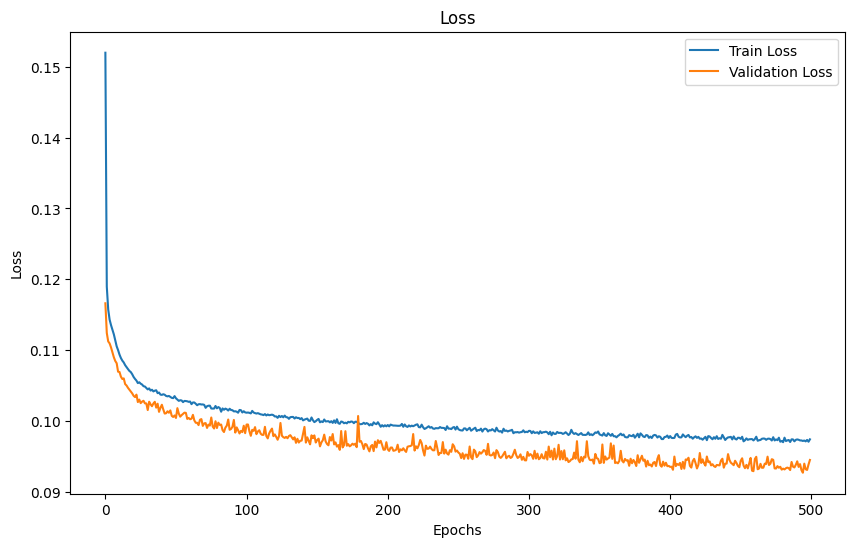

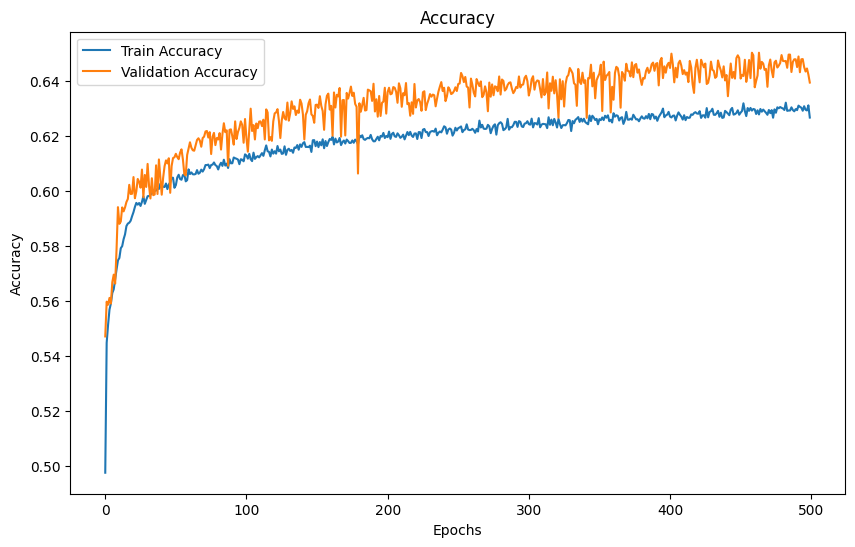

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
# Crear el modelo
model_8 = Sequential()
model_8.add(Dense(1024, input_dim=input_dim_2, activation='relu'))
model_8.add(Dense(512, activation='relu'))
model_8.add(Dense(256, activation='relu'))
model_8.add(Dense(128, activation='relu'))
model_8.add(Dense(64, activation='relu'))
model_8.add(Dense(32, activation='relu'))
model_8.add(Dense(16, activation='softmax'))  # Última capa con activación softmax

# Compilar el modelo
model_8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 600
batch_size = 64

# Entrenar el modelo
history = model_8.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2), validation_split=0.2)

Epoch 1/600
733/733 [==============================] - 13s 16ms/step - loss: 1.3952 - accuracy: 0.5381 - val_loss: 1.3010 - val_accuracy: 0.5520
Epoch 2/600
733/733 [==============================] - 11s 15ms/step - loss: 1.3071 - accuracy: 0.5546 - val_loss: 1.2907 - val_accuracy: 0.5621
Epoch 3/600
733/733 [==============================] - 12s 16ms/step - loss: 1.2901 - accuracy: 0.5631 - val_loss: 1.2721 - val_accuracy: 0.5646
Epoch 4/600
733/733 [==============================] - 11s 15ms/step - loss: 1.2676 - accuracy: 0.5713 - val_loss: 1.2775 - val_accuracy: 0.5624
Epoch 5/600
733/733 [==============================] - 11s 15ms/step - loss: 1.2541 - accuracy: 0.5775 - val_loss: 1.2325 - val_accuracy: 0.5905
Epoch 6/600
733/733 [==============================] - 11s 16ms/step - loss: 1.2392 - accuracy: 0.5846 - val_loss: 1.2102 - val_accuracy: 0.5957
Epoch 7/600
733/733 [==============================] - 12s 16ms/step - loss: 1.2213 - accuracy: 0.5904 - val_loss: 1.2076 - val_ac

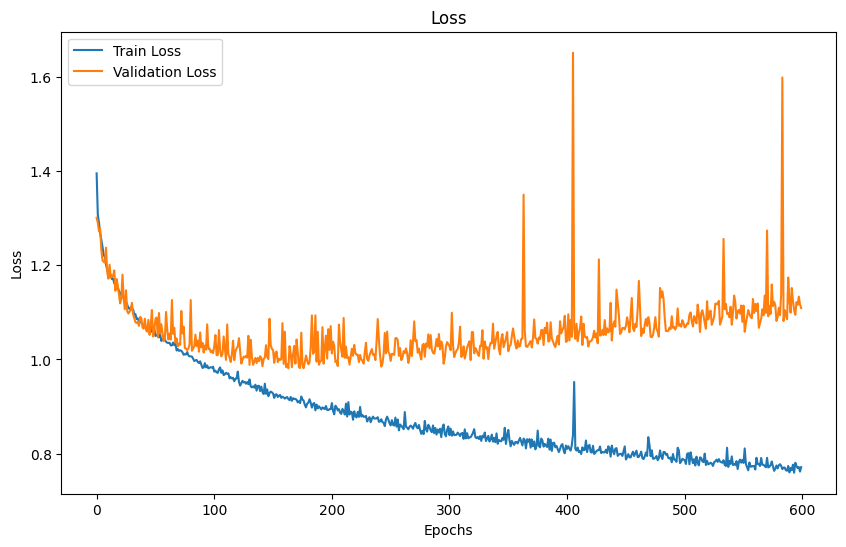

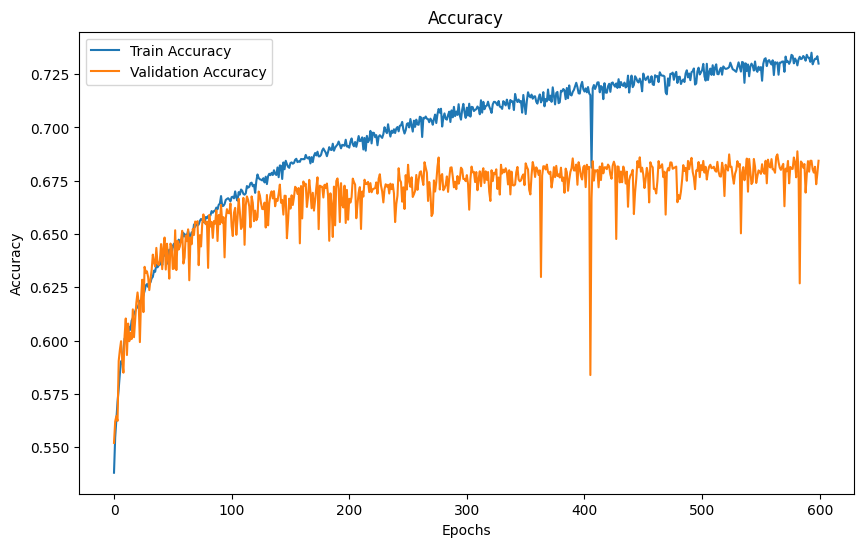

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
# Crear el modelo
model_9 = Sequential()
model_9.add(Dense(1024, input_dim=input_dim_2, activation='relu'))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.2))

model_9.add(Dense(512, activation='relu'))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.2))

model_9.add(Dense(256, activation='relu'))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.2))

model_9.add(Dense(128, activation='relu'))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.2))

model_9.add(Dense(64, activation='relu'))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.2))

model_9.add(Dense(32, activation='relu'))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.2))

model_9.add(Dense(16, activation='softmax'))  # Última capa con activación softmax

# Compilar el modelo
model_9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 600
batch_size = 64

# Entrenar el modelo
history = model_9.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2), validation_split=0.2)

Epoch 1/600
733/733 [==============================] - 20s 23ms/step - loss: 1.4116 - accuracy: 0.5484 - val_loss: 1.2784 - val_accuracy: 0.5733
Epoch 2/600
733/733 [==============================] - 17s 23ms/step - loss: 1.2784 - accuracy: 0.5792 - val_loss: 1.8290 - val_accuracy: 0.4439
Epoch 3/600
733/733 [==============================] - 18s 25ms/step - loss: 1.2412 - accuracy: 0.5912 - val_loss: 2.0170 - val_accuracy: 0.5397
Epoch 4/600
733/733 [==============================] - 16s 22ms/step - loss: 1.2207 - accuracy: 0.5945 - val_loss: 5.8172 - val_accuracy: 0.0717
Epoch 5/600
733/733 [==============================] - 16s 22ms/step - loss: 1.2080 - accuracy: 0.5995 - val_loss: 1.5326 - val_accuracy: 0.5623
Epoch 6/600
733/733 [==============================] - 17s 23ms/step - loss: 1.2030 - accuracy: 0.5994 - val_loss: 3.0987 - val_accuracy: 0.4241
Epoch 7/600
733/733 [==============================] - 17s 23ms/step - loss: 1.1945 - accuracy: 0.6029 - val_loss: 1.4510 - val_ac

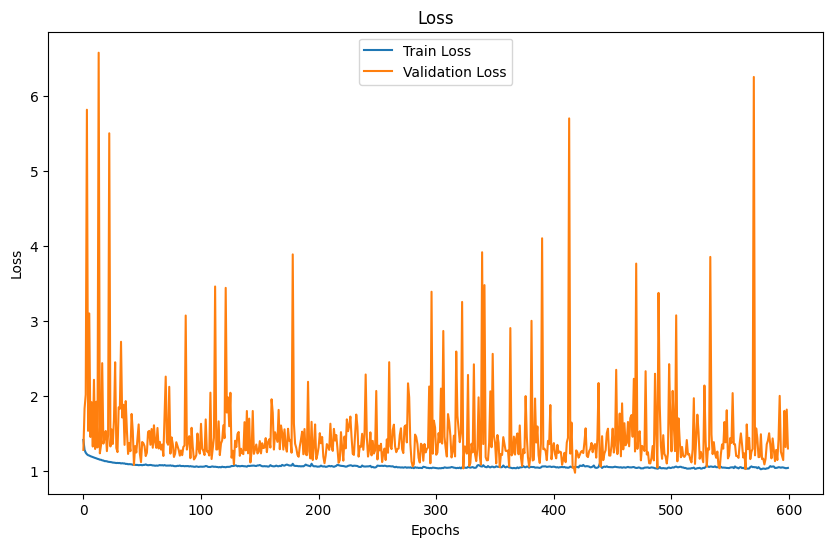

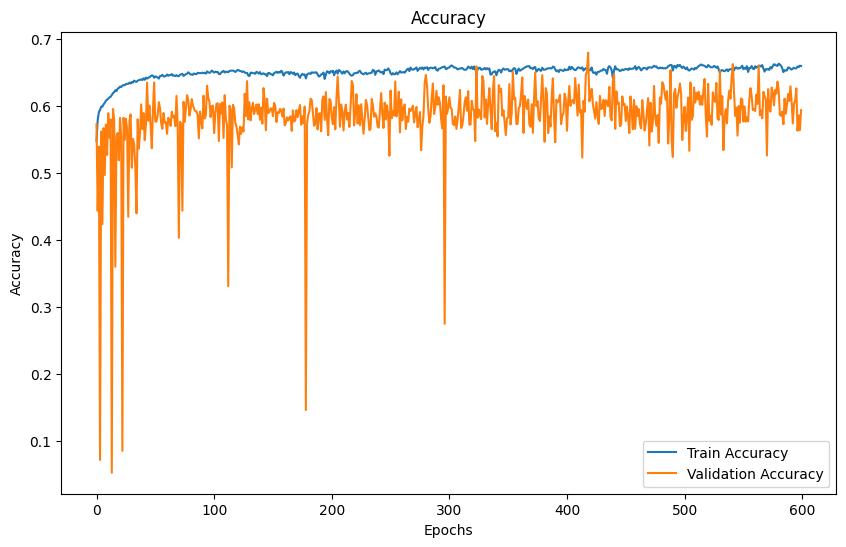

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
# Crear el modelo
model_10 = Sequential()
model_10.add(Dense(1024, input_dim=input_dim_2, activation='relu'))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.2))

model_10.add(Dense(512, activation='relu'))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.2))

model_10.add(Dense(256, activation='relu'))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.2))

model_10.add(Dense(128, activation='relu'))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.2))

model_10.add(Dense(64, activation='relu'))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.2))

model_10.add(Dense(32, activation='relu'))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.2))

model_10.add(Dense(16, activation='softmax'))  # Última capa con activación softmax

# Compilar el modelo
model_10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 600
batch_size = 64

# Entrenar el modelo
history = model_10.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2), validation_split=0.2)

Epoch 1/600
733/733 [==============================] - 25s 29ms/step - loss: 0.2673 - accuracy: 0.5318 - val_loss: 0.1165 - val_accuracy: 0.5591
Epoch 2/600
733/733 [==============================] - 20s 27ms/step - loss: 0.1189 - accuracy: 0.5654 - val_loss: 0.1102 - val_accuracy: 0.5741
Epoch 3/600
733/733 [==============================] - 19s 26ms/step - loss: 0.1143 - accuracy: 0.5740 - val_loss: 0.1078 - val_accuracy: 0.5775
Epoch 4/600
733/733 [==============================] - 21s 28ms/step - loss: 0.1121 - accuracy: 0.5813 - val_loss: 0.4648 - val_accuracy: 0.5028
Epoch 5/600
733/733 [==============================] - 19s 26ms/step - loss: 0.1105 - accuracy: 0.5902 - val_loss: 0.1261 - val_accuracy: 0.5453
Epoch 6/600
733/733 [==============================] - 19s 26ms/step - loss: 0.1085 - accuracy: 0.5936 - val_loss: 0.1747 - val_accuracy: 0.5320
Epoch 7/600
733/733 [==============================] - 22s 30ms/step - loss: 0.1073 - accuracy: 0.5979 - val_loss: 0.1176 - val_ac

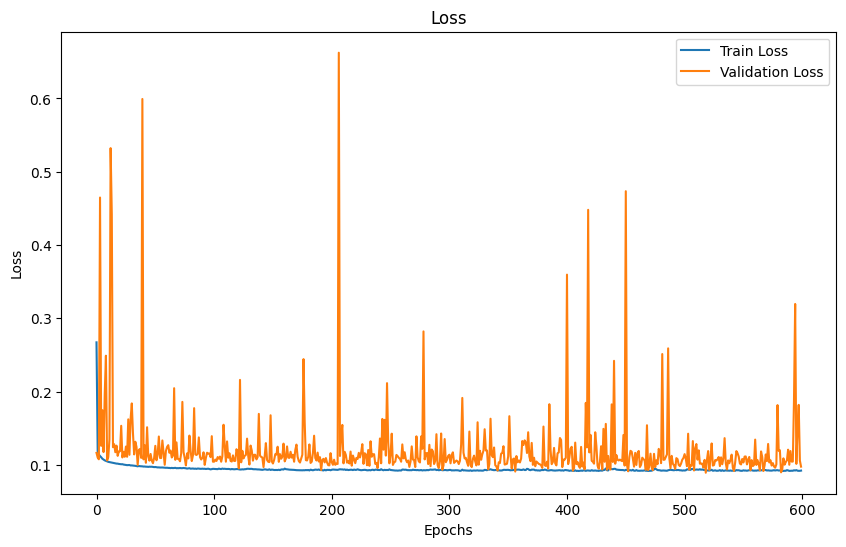

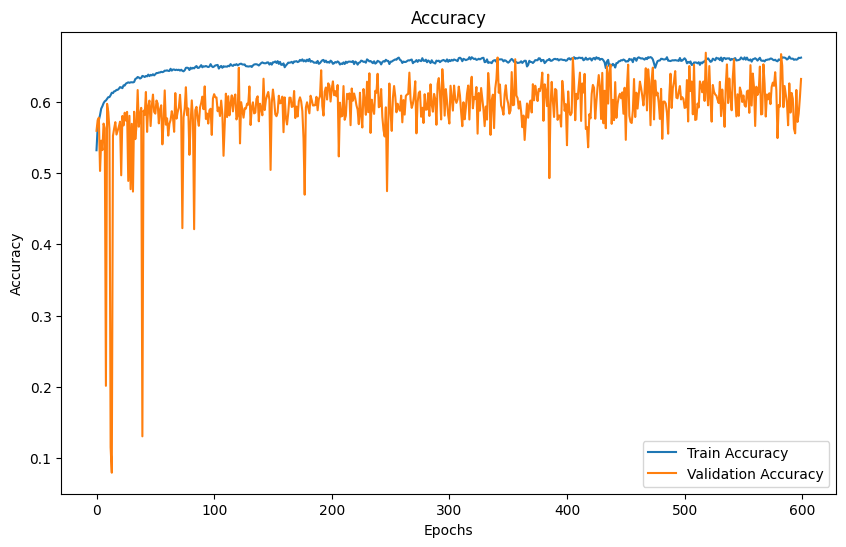

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
# Crear el modelo
model_11 = Sequential()
model_11.add(Dense(1024, input_dim=input_dim_2, activation='relu'))
model_11.add(BatchNormalization())
model_11.add(Dropout(0.4))  # Actualizacion

model_11.add(Dense(512, activation='relu'))
model_11.add(BatchNormalization())
model_11.add(Dropout(0.4))

model_11.add(Dense(256, activation='relu'))
model_11.add(BatchNormalization())
model_11.add(Dropout(0.4))

model_11.add(Dense(128, activation='relu'))
model_11.add(BatchNormalization())
model_11.add(Dropout(0.4))

model_11.add(Dense(64, activation='relu'))
model_11.add(BatchNormalization())
model_11.add(Dropout(0.4))

model_11.add(Dense(32, activation='relu'))
model_11.add(BatchNormalization())
model_11.add(Dropout(0.4))

model_11.add(Dense(16, activation='softmax'))  # Última capa con activación softmax

# Compilar el modelo
model_11.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 1000 # Actualizacion
batch_size = 500 # Actualizacion

# Entrenar el modelo
history = model_11.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2), validation_split=0.2)

Epoch 1/1000
94/94 [==============================] - 11s 78ms/step - loss: 0.7091 - accuracy: 0.2980 - val_loss: 0.5785 - val_accuracy: 0.5001
Epoch 2/1000
94/94 [==============================] - 9s 93ms/step - loss: 0.4607 - accuracy: 0.5261 - val_loss: 0.3387 - val_accuracy: 0.5004
Epoch 3/1000
94/94 [==============================] - 7s 79ms/step - loss: 0.2456 - accuracy: 0.5324 - val_loss: 0.2055 - val_accuracy: 0.5025
Epoch 4/1000
94/94 [==============================] - 8s 86ms/step - loss: 0.1681 - accuracy: 0.5324 - val_loss: 0.1432 - val_accuracy: 0.5050
Epoch 5/1000
94/94 [==============================] - 8s 85ms/step - loss: 0.1493 - accuracy: 0.5308 - val_loss: 0.1266 - val_accuracy: 0.5349
Epoch 6/1000
94/94 [==============================] - 8s 80ms/step - loss: 0.1407 - accuracy: 0.5332 - val_loss: 0.1229 - val_accuracy: 0.5422
Epoch 7/1000
94/94 [==============================] - 9s 96ms/step - loss: 0.1363 - accuracy: 0.5351 - val_loss: 0.1206 - val_accuracy: 0.542

In [ ]:
from tensorflow.keras.models import load_model

# Guardar el modelo completo
model_11.save('modelo_categorico.h5')

NameError: name 'model_11' is not defined

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo completo
modelo_cargado = load_model('mi_modelo.h5')

ValueError: File format not supported: filepath=/content/drive/MyDrive/modelo_binary. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/content/drive/MyDrive/modelo_binary, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

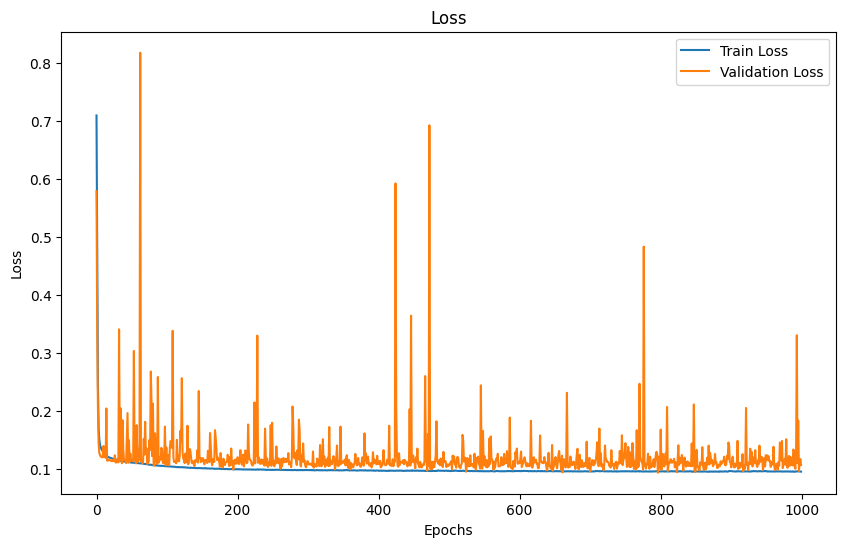

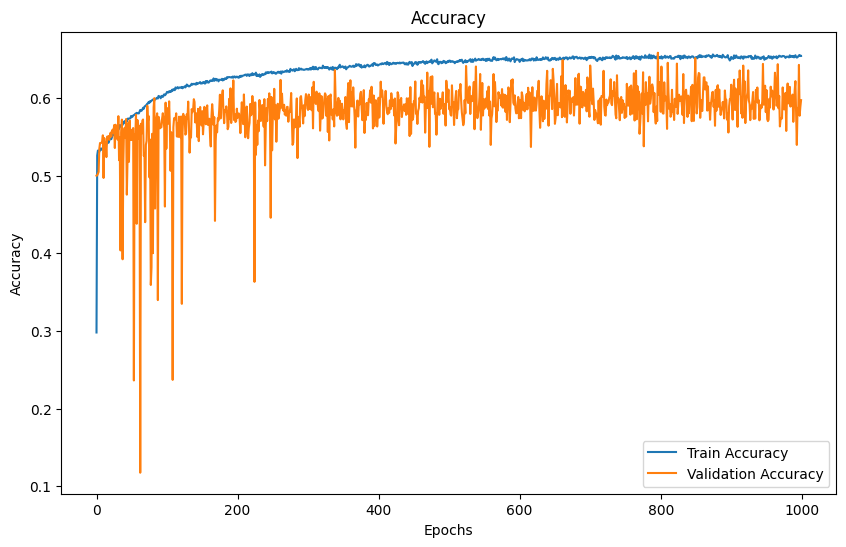

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
# Evaluar el modelo
loss_2, accuracy_2 = model_11.evaluate(X_test_2, y_test_2)
print(f'Test loss: {loss_2:.4f}')
print(f'Test accuracy: {accuracy_2:.4f}')

367/367 [==============================] - 1s 4ms/step - loss: 0.1061 - accuracy: 0.5974
Test loss: 0.1061
Test accuracy: 0.5974


In [ ]:
# Hacer predicciones

predictions_2 = model_11.predict(X_test_2)
print(predictions_2)

367/367 [==============================] - 1s 3ms/step
[[9.9999994e-01 3.1869022e-16 7.8251385e-17 ... 1.2545948e-18
  3.6257943e-17 1.6392185e-17]
 [1.3090872e-04 5.6187138e-02 2.6709180e-02 ... 7.5779050e-03
  2.6891695e-02 3.5671555e-02]
 [2.2414791e-04 5.7910439e-02 8.7785162e-02 ... 1.1500021e-01
  7.2985299e-02 4.6082102e-02]
 ...
 [9.9999994e-01 8.6188609e-16 2.4767789e-16 ... 3.4984020e-18
  1.2272783e-16 4.4575241e-17]
 [9.9999994e-01 1.7198223e-15 3.7082978e-16 ... 7.5766882e-18
  2.1680950e-16 9.3547880e-17]
 [9.9999994e-01 3.1790979e-14 1.4460887e-14 ... 6.2850406e-16
  2.9849244e-15 2.8876302e-15]]


In [ ]:
model_14 = Sequential()
model_14.add(Dense(1024, input_dim=input_dim_2, activation='relu'))
model_14.add(BatchNormalization())
model_14.add(Dropout(0.4))  # Actualizacion

model_14.add(Dense(512, activation='relu'))
model_14.add(BatchNormalization())
model_14.add(Dropout(0.4))

model_14.add(Dense(256, activation='relu'))
model_14.add(BatchNormalization())
model_14.add(Dropout(0.4))

model_14.add(Dense(128, activation='relu'))
model_14.add(BatchNormalization())
model_14.add(Dropout(0.4))

model_14.add(Dense(64, activation='relu'))
model_14.add(BatchNormalization())
model_14.add(Dropout(0.4))

model_14.add(Dense(32, activation='relu'))
model_14.add(BatchNormalization())
model_14.add(Dropout(0.4))

model_14.add(Dense(16, activation='softmax'))  # Última capa con activación softmax

# Compilar el modelo
model_14.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 1000 # Actualizacion
batch_size = 500 # Actualizacion

# Entrenar el modelo
history = model_14.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2), validation_split=0.2)

In [ ]:
# Crear el modelo
model_12 = Sequential()
model_12.add(Dense(1024, input_dim=input_dim_2, activation='relu'))
model_12.add(BatchNormalization())
model_12.add(Dropout(0.4))  # Actualizacion

model_12.add(Dense(512, activation='relu'))
model_12.add(BatchNormalization())
model_12.add(Dropout(0.4))

model_12.add(Dense(256, activation='relu'))
model_12.add(BatchNormalization())
model_12.add(Dropout(0.4))

model_12.add(Dense(128, activation='relu'))
model_12.add(BatchNormalization())
model_12.add(Dropout(0.4))

model_12.add(Dense(64, activation='relu'))
model_12.add(BatchNormalization())
model_12.add(Dropout(0.4))

model_12.add(Dense(32, activation='relu'))
model_12.add(BatchNormalization())
model_12.add(Dropout(0.4))

model_12.add(Dense(16, activation='softmax'))  # Última capa con activación softmax

# Compilar el modelo
model_12.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 1000 # Actualizacion
batch_size = 500 # Actualizacion

# Entrenar el modelo
history = model_12.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2), validation_split=0.2)

Epoch 1/1000
94/94 [==============================] - 15s 116ms/step - loss: 1.8580 - accuracy: 0.4827 - val_loss: 3.0631 - val_accuracy: 0.5000
Epoch 2/1000
94/94 [==============================] - 9s 92ms/step - loss: 1.4456 - accuracy: 0.5427 - val_loss: 3.1621 - val_accuracy: 0.5000
Epoch 3/1000
94/94 [==============================] - 10s 110ms/step - loss: 1.3881 - accuracy: 0.5485 - val_loss: 3.3908 - val_accuracy: 0.5000
Epoch 4/1000
94/94 [==============================] - 10s 110ms/step - loss: 1.3537 - accuracy: 0.5547 - val_loss: 2.1719 - val_accuracy: 0.5029
Epoch 5/1000
94/94 [==============================] - 9s 92ms/step - loss: 1.3331 - accuracy: 0.5581 - val_loss: 1.3012 - val_accuracy: 0.5706
Epoch 6/1000
94/94 [==============================] - 10s 112ms/step - loss: 1.3116 - accuracy: 0.5660 - val_loss: 1.3374 - val_accuracy: 0.5658
Epoch 7/1000
94/94 [==============================] - 11s 114ms/step - loss: 1.2997 - accuracy: 0.5682 - val_loss: 1.2725 - val_accura

In [ ]:
import os

# Crear un directorio para guardar el modelo
model_dir = 'modelo_guardado_2'
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

# Guardar el modelo en formato SavedModel
model_12.save(model_dir, save_format='tf')

In [ ]:
import os
from tensorflow import keras

# Cargar el modelo desde el directorio
model_dir = 'modelo_guardado_2'
modelo_cargado = keras.models.load_model(model_dir)

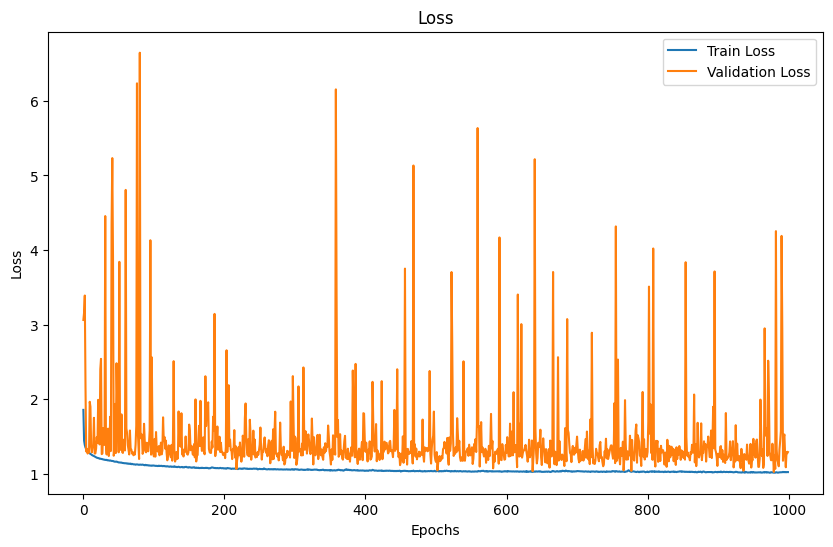

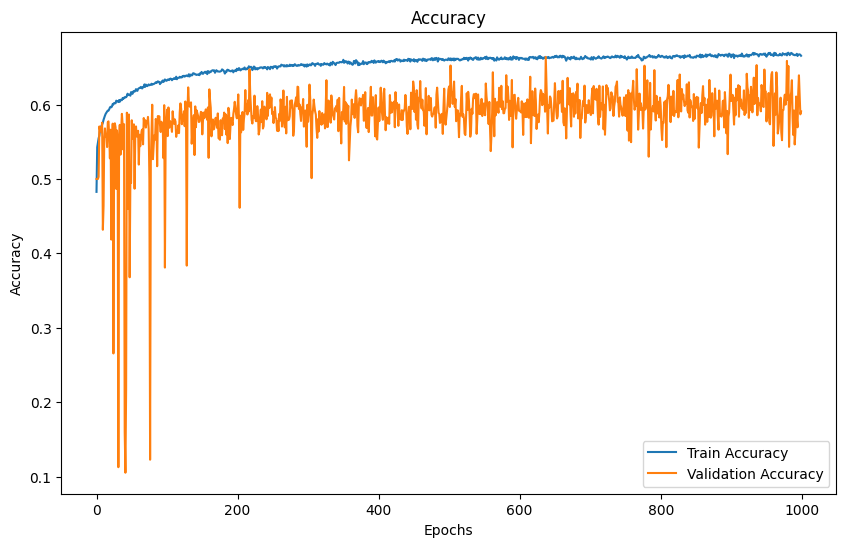

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

# Indicaciones del profesor

In [ ]:
from tensorflow.keras.layers import Flatten
model_15 = Sequential()
model_15.add(Dense(1024, input_dim=input_dim_2, activation='relu'))
model_15.add(BatchNormalization())
model_15.add(Dropout(0.4))  # Actualizacion

model_15.add(Dense(512, activation='relu'))
model_15.add(BatchNormalization())
model_15.add(Dropout(0.4))

model_15.add(Dense(256, activation='relu'))
model_15.add(BatchNormalization())
model_15.add(Dropout(0.4))

model_15.add(Dense(128, activation='relu'))
model_15.add(BatchNormalization())
model_15.add(Dropout(0.4))

model_15.add(Dense(64, activation='relu'))
model_15.add(BatchNormalization())
model_15.add(Dropout(0.4))

model_15.add(Dense(32, activation='relu'))
model_15.add(BatchNormalization())
#model_15.add(Dropout(0.4)) # Indicaciones de quitar este ultimo dropout

model_15.add(Flatten()) # cambio agregado
#model_15.add(Dense(16, activation='softmax'))  # Última capa con activación softmax
model_15.add(Dense(1, activation='linear'))  # Cambia esta línea


# Compilar el modelo
#model_15.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy']) # otro cambio
model_15.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])  # Cambia esta línea

epochs = 1000 # Actualizacion
batch_size = 500 # Actualizacion

# Entrenar el modelo
history = model_15.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2), validation_split=0.2)

Epoch 1/1000
94/94 [==============================] - 12s 83ms/step - loss: 0.6584 - mean_absolute_error: 0.5602 - val_loss: 0.0658 - val_mean_absolute_error: 0.0879
Epoch 2/1000
94/94 [==============================] - 9s 92ms/step - loss: 0.1427 - mean_absolute_error: 0.2660 - val_loss: 0.0614 - val_mean_absolute_error: 0.0902
Epoch 3/1000
94/94 [==============================] - 7s 76ms/step - loss: 0.0967 - mean_absolute_error: 0.2028 - val_loss: 0.0639 - val_mean_absolute_error: 0.0779
Epoch 4/1000
94/94 [==============================] - 9s 90ms/step - loss: 0.0819 - mean_absolute_error: 0.1752 - val_loss: 0.0610 - val_mean_absolute_error: 0.0901
Epoch 5/1000
94/94 [==============================] - 8s 86ms/step - loss: 0.0736 - mean_absolute_error: 0.1565 - val_loss: 0.0603 - val_mean_absolute_error: 0.1093
Epoch 6/1000
94/94 [==============================] - 7s 79ms/step - loss: 0.0694 - mean_absolute_error: 0.1457 - val_loss: 0.0599 - val_mean_absolute_error: 0.1194
Epoch 7/1

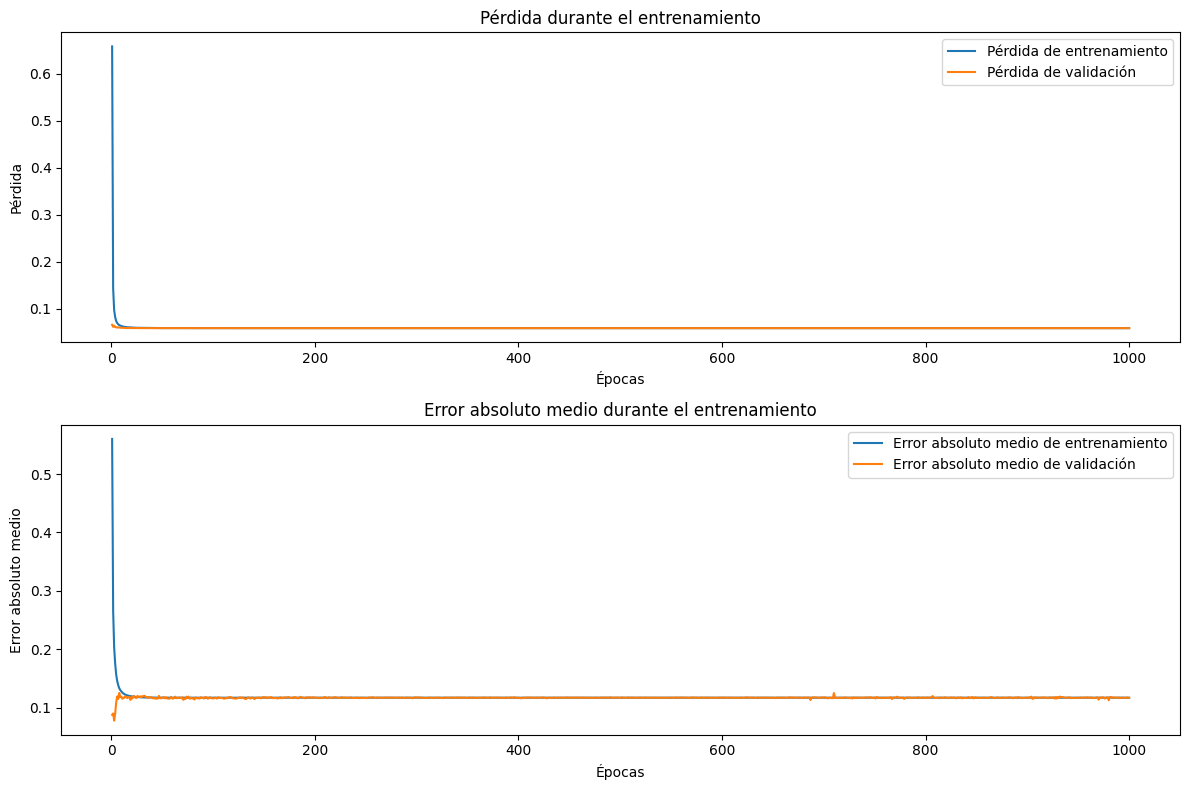

In [ ]:
import matplotlib.pyplot as plt

# Obtener los valores del historial
loss = history.history['loss']
mae = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_mae = history.history['val_mean_absolute_error']

# Número de épocas
epochs = range(1, len(loss) + 1)

# Graficar
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, mae, label='Error absoluto medio de entrenamiento')
plt.plot(epochs, val_mae, label='Error absoluto medio de validación')
plt.title('Error absoluto medio durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error absoluto medio')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(46876, 43)
(46876, 16)
(11720, 43)
(11720, 16)


In [ ]:
#from tensorflow import to_categorical
#y_train_target = to_categorical(y_train_2, 16)
#y_test_target = to_categorical(y_test_2, 16)
import numpy as np

y_train_2 = np.argmax(y_train_2, axis=1)
y_test_2 = np.argmax(y_test_2, axis=1)
print(y_train_2)
print(y_test_2)

[ 0  7 10 ...  2  0  9]
[0 5 5 ... 0 0 0]


In [ ]:
#from tensorflow import to_categorical
#y_train_target = to_categorical(y_train_2, 16)
#y_test_target = to_categorical(y_test_2, 16)

In [ ]:
model_16 = Sequential()
model_16.add(Dense(1024, input_dim=input_dim_2, activation='relu'))
model_16.add(BatchNormalization())
model_16.add(Dropout(0.4)) # Actualizacion
model_16.add(Dense(512, activation='relu'))
model_16.add(BatchNormalization())
model_16.add(Dropout(0.4))
model_16.add(Dense(256, activation='relu'))
model_16.add(BatchNormalization())
model_16.add(Dropout(0.4))
model_16.add(Dense(128, activation='relu'))
model_16.add(BatchNormalization())
model_16.add(Dropout(0.4))
model_16.add(Dense(64, activation='relu'))
model_16.add(BatchNormalization())
model_16.add(Dropout(0.4))
model_16.add(Dense(32, activation='relu'))
model_16.add(BatchNormalization())
#model_15.add(Dropout(0.4)) # Indicaciones de quitar este ultimo dropout
model_16.add(Dense(16, activation='softmax')) # Última capa con activación softmax
# Compilar el modelo
model_16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 1000 # Actualizacion
batch_size = 500 # Actualizacion
# Entrenar el modelo
history = model_16.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2), validation_split=0.2)


Epoch 1/1000
94/94 [==============================] - 15s 106ms/step - loss: 1.6837 - accuracy: 0.5120 - val_loss: 2.4962 - val_accuracy: 0.5000
Epoch 2/1000
94/94 [==============================] - 9s 93ms/step - loss: 1.3515 - accuracy: 0.5559 - val_loss: 2.8379 - val_accuracy: 0.5003
Epoch 3/1000
94/94 [==============================] - 7s 79ms/step - loss: 1.3100 - accuracy: 0.5661 - val_loss: 2.7929 - val_accuracy: 0.5009
Epoch 4/1000
94/94 [==============================] - 9s 94ms/step - loss: 1.2879 - accuracy: 0.5707 - val_loss: 2.3020 - val_accuracy: 0.5153
Epoch 5/1000
94/94 [==============================] - 7s 79ms/step - loss: 1.2734 - accuracy: 0.5776 - val_loss: 1.4937 - val_accuracy: 0.5449
Epoch 6/1000
94/94 [==============================] - 9s 92ms/step - loss: 1.2625 - accuracy: 0.5775 - val_loss: 1.2619 - val_accuracy: 0.5818
Epoch 7/1000
94/94 [==============================] - 8s 87ms/step - loss: 1.2514 - accuracy: 0.5847 - val_loss: 1.2647 - val_accuracy: 0.57

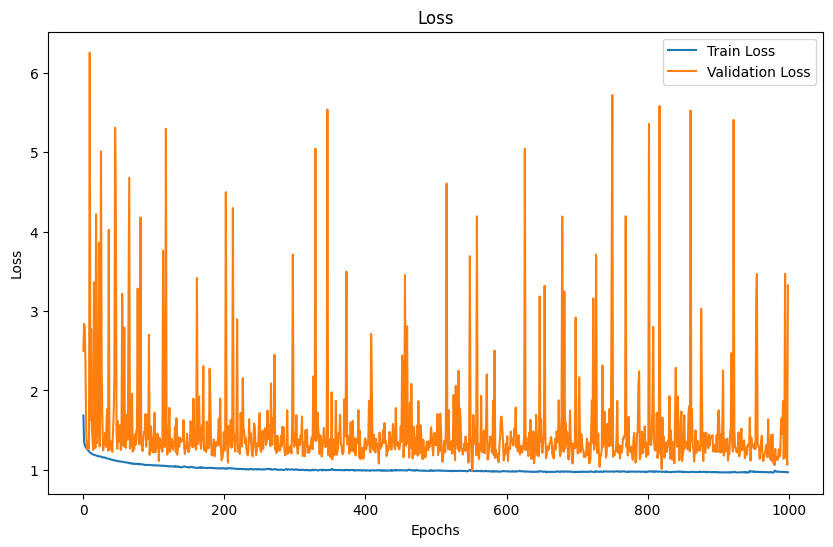

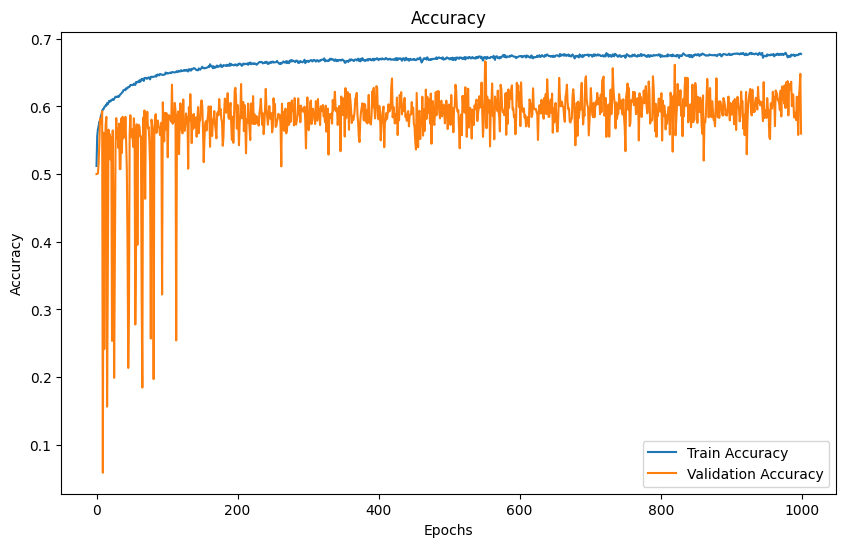

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
model_17 = Sequential()
model_17.add(Dense(2048, input_dim=input_dim_2, activation='relu'))
model_17.add(BatchNormalization())
model_17.add(Dropout(0.4)) # Actualizacion

model_17.add(Dense(1024, activation='relu'))
model_17.add(BatchNormalization())
model_17.add(Dropout(0.4))

model_17.add(Dense(1024, activation='relu'))
model_17.add(BatchNormalization())
model_17.add(Dropout(0.4))

model_17.add(Dense(512, activation='relu'))
model_17.add(BatchNormalization())
model_17.add(Dropout(0.4))

model_17.add(Dense(512, activation='relu'))
model_17.add(BatchNormalization())
model_17.add(Dropout(0.4))

model_17.add(Dense(256, activation='relu'))
model_17.add(BatchNormalization())
model_17.add(Dropout(0.4))

model_17.add(Dense(256, activation='relu'))
model_17.add(BatchNormalization())
model_17.add(Dropout(0.4))

model_17.add(Dense(128, activation='relu'))
model_17.add(BatchNormalization())
model_17.add(Dropout(0.4))

model_17.add(Dense(128, activation='relu'))
model_17.add(BatchNormalization())
model_17.add(Dropout(0.4))

model_17.add(Dense(64, activation='relu'))
model_17.add(BatchNormalization())
model_17.add(Dropout(0.4))

model_17.add(Dense(64, activation='relu'))
model_17.add(BatchNormalization())
model_17.add(Dropout(0.4))

model_17.add(Dense(32, activation='relu'))
model_17.add(BatchNormalization())

model_17.add(Dense(32, activation='relu'))
model_17.add(BatchNormalization())

#model_15.add(Dropout(0.4)) # Indicaciones de quitar este ultimo dropout
model_17.add(Dense(16, activation='softmax')) # Última capa con activación softmax
# Compilar el modelo
model_17.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 600 # Actualizacion
batch_size = 500 # Actualizacion
# Entrenar el modelo
history = model_17.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_2, y_test_2), validation_split=0.2)

Epoch 1/600
94/94 [==============================] - 47s 410ms/step - loss: 2.3685 - accuracy: 0.3027 - val_loss: 2.1097 - val_accuracy: 0.5009
Epoch 2/600
94/94 [==============================] - 39s 415ms/step - loss: 1.4269 - accuracy: 0.5320 - val_loss: 3.4889 - val_accuracy: 0.5000
Epoch 3/600
94/94 [==============================] - 42s 446ms/step - loss: 1.3732 - accuracy: 0.5369 - val_loss: 3.8780 - val_accuracy: 0.5000
Epoch 4/600
94/94 [==============================] - 42s 453ms/step - loss: 1.3569 - accuracy: 0.5446 - val_loss: 1.8038 - val_accuracy: 0.5154
Epoch 5/600
94/94 [==============================] - 38s 408ms/step - loss: 1.3403 - accuracy: 0.5488 - val_loss: 1.4057 - val_accuracy: 0.5354
Epoch 6/600
94/94 [==============================] - 43s 457ms/step - loss: 1.3273 - accuracy: 0.5494 - val_loss: 1.3133 - val_accuracy: 0.5629
Epoch 7/600
94/94 [==============================] - 44s 465ms/step - loss: 1.3205 - accuracy: 0.5530 - val_loss: 1.4504 - val_accuracy:

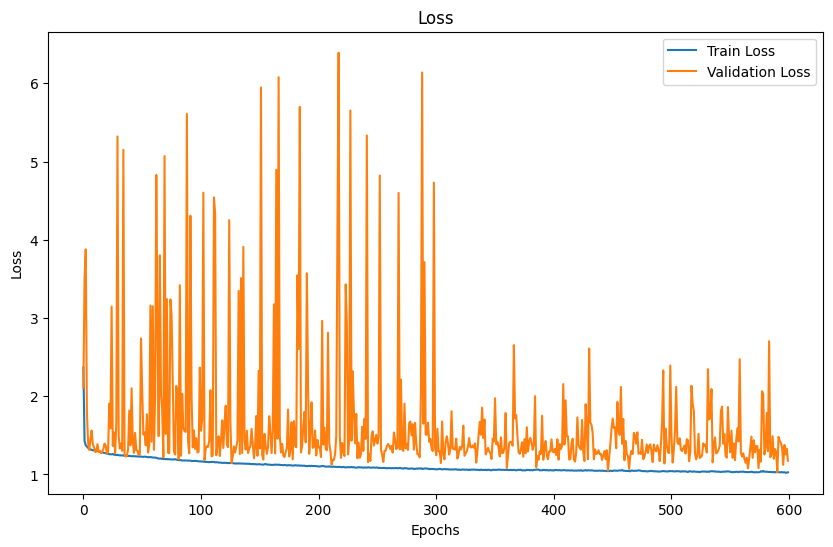

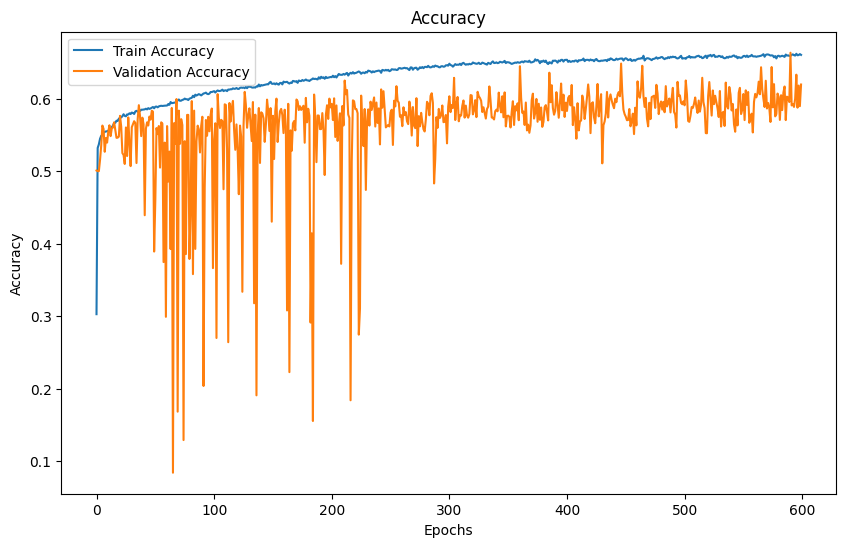

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

# Pruebas con la parte convolucional

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

# Supongamos que X_train y X_test son matrices 2D
# Necesitamos convertirlas a formato de imagen 4D
X_train_conv = X_train_2.reshape(X_train_2.shape[0], 43, 1, 1)
X_test_conv = X_test_2.reshape(X_test_2.shape[0], 43, 1, 1)

# Definir la arquitectura de la red
model = Sequential()

# Parte convolucional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(43, 1, 1), padding='same'))
model.add(MaxPooling2D((2, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 1), padding='same'))
model.add(Flatten())

# Parte densa
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_conv, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_conv, y_test_2))

Epoch 1/10
1465/1465 [==============================] - 9s 5ms/step - loss: 1.4447 - accuracy: 0.5315 - val_loss: 1.3498 - val_accuracy: 0.5483
Epoch 2/10
1465/1465 [==============================] - 9s 6ms/step - loss: 1.3546 - accuracy: 0.5438 - val_loss: 1.3285 - val_accuracy: 0.5520
Epoch 3/10
1465/1465 [==============================] - 8s 6ms/step - loss: 1.3386 - accuracy: 0.5502 - val_loss: 1.3172 - val_accuracy: 0.5544
Epoch 4/10
1465/1465 [==============================] - 8s 5ms/step - loss: 1.3257 - accuracy: 0.5534 - val_loss: 1.3020 - val_accuracy: 0.5613
Epoch 5/10
1465/1465 [==============================] - 8s 6ms/step - loss: 1.3162 - accuracy: 0.5566 - val_loss: 1.2907 - val_accuracy: 0.5695
Epoch 6/10
1465/1465 [==============================] - 8s 6ms/step - loss: 1.3040 - accuracy: 0.5608 - val_loss: 1.2799 - val_accuracy: 0.5710
Epoch 7/10
1465/1465 [==============================] - 9s 6ms/step - loss: 1.2942 - accuracy: 0.5638 - val_loss: 1.2672 - val_accuracy:

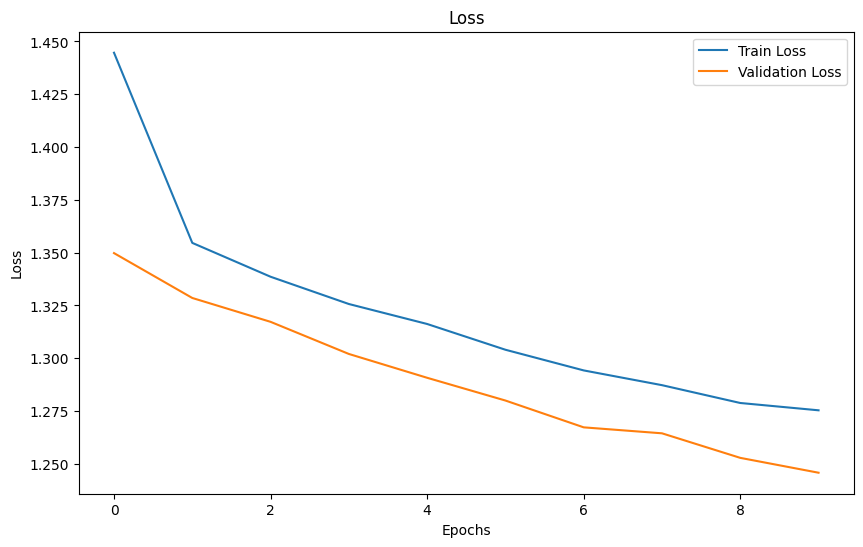

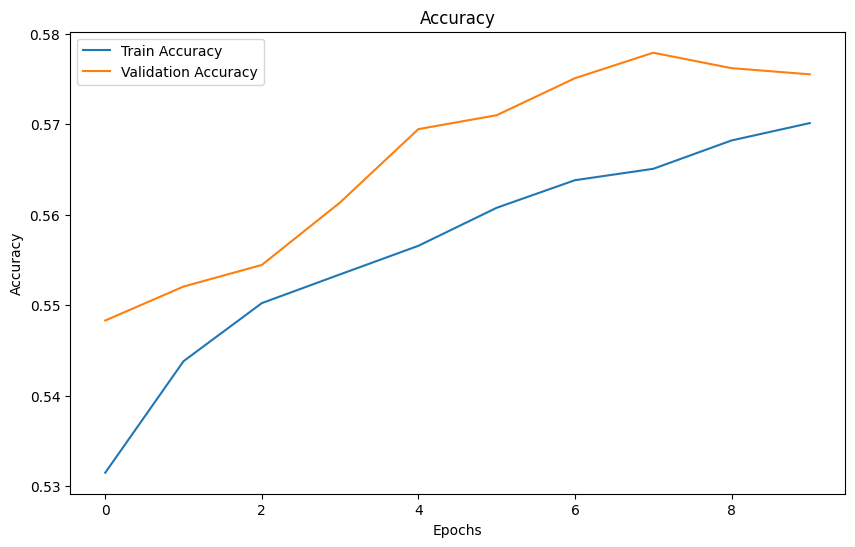

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Definir el modelo
model2 = Sequential()

# Capas convolucionales
model2.add(Conv1D(64, 3, activation='relu', input_shape=(43, 1)))
model2.add(MaxPooling1D(2))

model2.add(Conv1D(128, 3, activation='relu'))
model2.add(MaxPooling1D(2))

model2.add(Flatten())

# Red neuronal densa
model2.add(Dense(128, activation='relu'))
model2.add(Dense(16, activation='softmax'))

# Compilar el modelo
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model2.fit(X_train_2.reshape((-1, 43, 1)), y_train_2, epochs=10, batch_size=32, validation_data=(X_test_2.reshape((-1, 43, 1)), y_test_2))


Epoch 1/10
1465/1465 [==============================] - 10s 6ms/step - loss: 1.3902 - accuracy: 0.5426 - val_loss: 1.3292 - val_accuracy: 0.5469
Epoch 2/10
1465/1465 [==============================] - 9s 6ms/step - loss: 1.3075 - accuracy: 0.5628 - val_loss: 1.2775 - val_accuracy: 0.5686
Epoch 3/10
1465/1465 [==============================] - 10s 7ms/step - loss: 1.2658 - accuracy: 0.5764 - val_loss: 1.2422 - val_accuracy: 0.5833
Epoch 4/10
1465/1465 [==============================] - 9s 6ms/step - loss: 1.2358 - accuracy: 0.5883 - val_loss: 1.2275 - val_accuracy: 0.5976
Epoch 5/10
1465/1465 [==============================] - 9s 6ms/step - loss: 1.2117 - accuracy: 0.5978 - val_loss: 1.1966 - val_accuracy: 0.6024
Epoch 6/10
1465/1465 [==============================] - 9s 6ms/step - loss: 1.1938 - accuracy: 0.6051 - val_loss: 1.1874 - val_accuracy: 0.6038
Epoch 7/10
1465/1465 [==============================] - 10s 7ms/step - loss: 1.1771 - accuracy: 0.6080 - val_loss: 1.1674 - val_accura

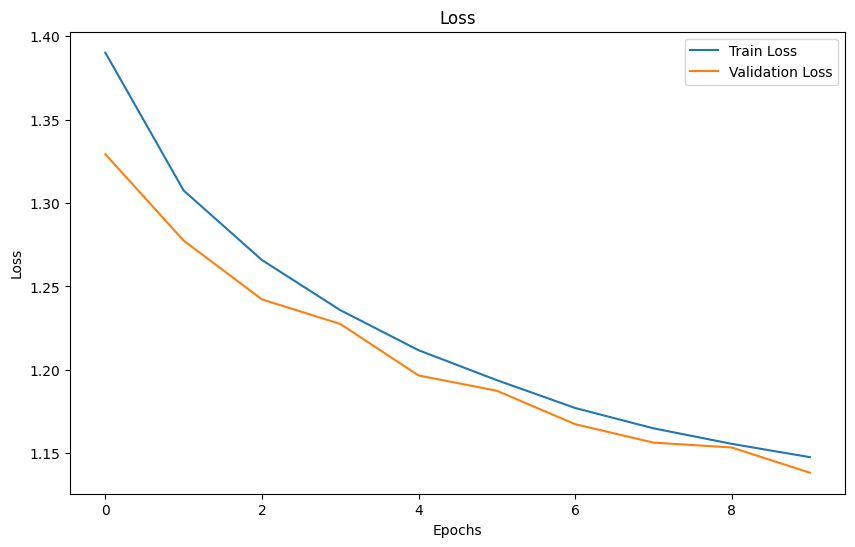

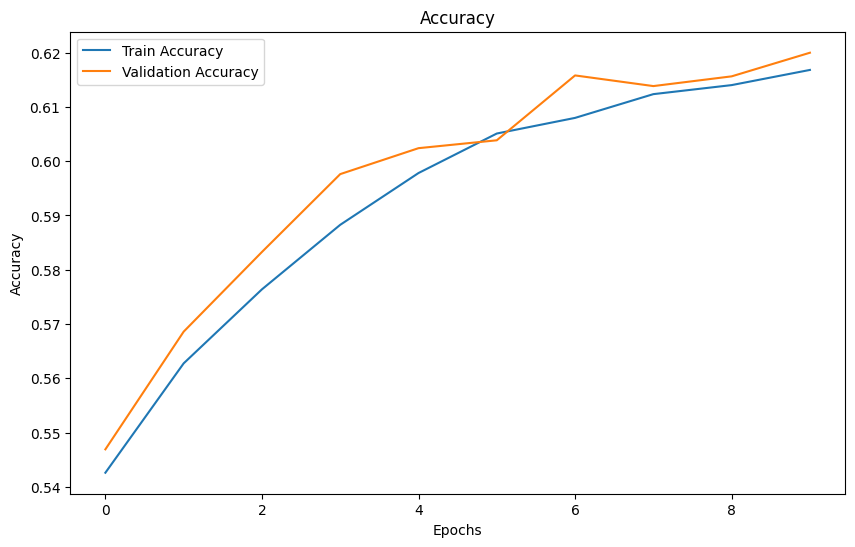

In [ ]:
# Graficar loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.optimizers import Adam

# Restructurar los datos de entrada
X_train_CNN = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 1, 1))
X_test_CNN = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1, 1))

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(43, 1, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='softmax'))

# Compilar el modelo
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_CNN, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_CNN, y_test_2))